Previous: [P1 Compute Statistics From Card Draws](../p1/dand-p1-compute-statistics-from-card-draws.ipynb) | [Table of Contents](https://github.com/federicomariamassari/udacity-dand/blob/master/README.md) | Next: [P3 Wrangle OpenStreetMap Data](https://github.com/federicomariamassari/udacity-dand/blob/master/projects/p3/dand-p3-wrangle-openstreetmap.md)

# Data Analyst Nanodegree: P2 Investigate a Dataset
__Federico Maria Massari / federico.massari@bocconialumni.it__

> The report investigates the __Titanic dataset__, one of Udacity's curated datasets. The project is connected to the course [_Introduction to Data Analysis_](https://www.udacity.com/course/intro-to-data-analysis--ud170) and uses Python data science libraries for a neater and faster code.

> Library versions used: Python 3.6.2, NumPy 1.13.1, SciPy 0.19.1, Pandas 0.20.3, Matplotlib 2.0.2, Seaborn 0.8.1. Previous versions of the packages may still produce the desired output.

> __Keywords:__ Data Analysis, Titanic Dataset, Python, Pandas, Seaborn.

## Project Overview
Choose one of Udacity's curated datasets and investigate it using Python data science libraries: NumPy, SciPy, Pandas, Matplotlib, and Seaborn. Go through the entire data analysis process: 
1. __Question phase__: look at the dataset and pose questions that could be answered using it;
2. __Data wrangling phase__: import the raw dataset into the Jupyter notebook (data acquisition step), and clean up any problems found (data cleaning step);
3. __Exploration phase__: get familiar with the data, build intuitions about them, and find patterns (usually intertwined with the data cleaning step);
4. __Conclusions phase__: draw conclusions or make predictions, possibly using statistics and/or machine learning;
5. __Communication phase__: communicate findings and conclusions, e.g. using a Jupyter notebook;
6. __Follow-up phase__: look for developments in the dataset or for the release of new information (if applicable).

## Introduction
At the time of its maiden voyage, which began on April 10, 1912, RMS Titanic was the largest ship ever to set sail, the second of three Olympic-class vessels in White Star Line's fleet—following the RMS Olympic and preceding the HMHS Britannic.

After brief sea trials in Belfast, then Ireland (where it was built), the Titanic, commanded by Capt. Edward John Smith, departed Southampton, England, on April 10, called at Cherbourg, France, and Queenstown (now Cobh), Ireland, to embark more passengers, and finally left for New York City, never to arrive [Table 1].

The ship would sink in the North Atlantic Ocean four days later, in the early morning hours of April 15, 1912, after colliding with an iceberg. More than 1,500 of the estimated 2,224 people aboard—including the Captain, who went down with his ship—perished in the shipwreck.

According to [Wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic), the cause of such a high death toll was twofold:

- There were _not enough lifeboats_ on the ship. Titanic only carried enough lifeboats for 1,178 people, approximately half of the number onboard;


- The _"women and children first" protocol_ for loading lifeboats was strictly followed. As several women and kids were still on the ship, most men were refused to board the lifeboats. However, the former—mostly third-class—were likely trapped in the lower decks and could not reach the Boat deck (i.e. get outside) on time. Many lifeboats were launched only partially loaded and, as a consequence, when the Titanic broke apart at 2:20 a.m., over one thousand people still aboard went down with it.

An estimated 705 survivors (~500 less than what lifeboats could have accomodated) were later rescued by the RMS Carpathia and safely landed in New York City on April 18.

#### Table 1: Titanic Route
Day|Hour|Port|Country|Description
-:|-:|:-|:-|:-
April 2, 1912|06:00|Belfast|Ireland|RMS Titanic begins sea trials.
April 2, 1912|20:00|Belfast|Ireland|Departure from Belfast, sailing to Southampton.
April 4, 1912|00:00|Southampton|England|Arrival in Southampton.
April 10, 1912|12:00|Southampton|England|Departure from Southampton, sailing to Cherbourg.
April 10, 1912|18:30|Cherbourg|France|Arrival in Cherbourg.
April 10, 1912|20:10|Cherbourg|France|Departure from Cherbourg, sailing to Queenstown (now Cobh).
April 11, 1912|11:30|Queenstown|Ireland|Arrival in Queenstown.
April 11, 1912|13:30|Queenstown|Ireland|Departure from Queenstown, sailing to New York City.
April 14, 1912|23:40|North Atlantic Ocean|-|RMS Titanic hits an iceberg.
April 15, 1912|02:20|North Atlantic Ocean|-|RMS Titanic begins to sink.
April 15, 1912|04:00|North Atlantic Ocean|-|RMS Carpathia picks up the survivors from the lifeboats.
April 18, 1912|21:00|New York City|United States|RMS Carpathia arrives in New York City, survivors disembark.
Source: [Discover Northern Ireland](https://www.discovernorthernireland.com/things-to-do/attractions/titanic/titanic-sailing-route-map/)

[Encyclopedia Titanica](https://www.encyclopedia-titanica.org) states that the over 2,200 passengers carried by the Titanic were _"people all ages, [...] of great wealth"_—the magnates John Astor and Benjamin Guggenheim were aboard—_"and of bitter poverty. If you could walk the decks of RMS Titanic you would hear a dozen or more languages being spoken with every imaginable dialect. Not surprisingly RMS Titanic is often described as a microcosm of society."_

This last sentence hints at a rich dataset that can be explored in many different ways.

## The Dataset
The dataset, a csv file, contains demographics and passenger information from 891 of the 2,224 passengers and crew onboard the Titanic. It was obtained from [Kaggle](https://www.kaggle.com/c/titanic/data) (training set).

## 1. Question Phase
By briefly looking at the data, three sets of questions immediately come to mind. These are related to:

- Survival
- Socio-economic status
- Family composition

### Survival
This is by far the most interesting dimension to explore.

- What is the overall survival rate?
- Which characteristics made survival more likely?

The first question is simple to answer—it requires to determine the percentage of all survivors in the sample and, possibly, to compare the statistic to the available datum for the population.

The second one is, instead, very broad, and can be investigated from multiple angles. From the introduction, one can infer that the combination of a strict "women and children first" protocol and the fact that many of these women and children were trapped in the lower decks and could not reach the top—with consequent departure of not fully loaded lifeboats—greatly affected the chance of passenger survival. As a consequence, it is informative to ask:

- What role did gender, age, class, and deck placement, and what their interactions, play in passenger survival?
- How is survival related to other factors, such as presence of family aboard and family size, education, money spent on tickets, and port of embarkation?

### Socio-Economic Status
Since the Titanic was a "microcosm of society", and since—according to Kaggle—passenger classes can be considered a proxy for socio-economic status (1st: upper class, 2nd: middle, 3rd: lower), one could dig into the dataset to see:

- In which proportion did first, second, and third class passengers board the Titanic?
- What was their placement inside the ship?
- Where were the most expensive cabins located, and where the cheapest ones?
- Who were the biggest spenders and who spent the most for a single room?

### Family Composition
The dataset is also granular enough to include plenty of information related to the presence, and size, of families onboard. Hints are given by the name and title of the passenger, as well as the number of siblings/spouse, and number of parents/children onboard. Therefore, one might ask:

- How many passengers travelled with their family? How many with their spouse?
- Which class had the most numerous families onboard, on average?
- How is family size related to cabin choice?

## 2. Data Wrangling Phase
The data wrangling phase consists of two steps: data acquisition and data cleaning.

### 2.1 Data Acquisition
Start by importing the modules required to read and analyse the dataset, using aliases for cleaner code. Of the last three lines of code, the third-to-last one increases figure resolution, the penultimate sets options for Pandas objects—chart value precision to four decimal points and maximum number of displayed columns to 50—and the last one adopts Seaborn's style to display figures.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
pd.set_option('precision', 4, 'display.max_columns', 50)
sns.set()

Read `titanic-data.csv` using Pandas. Pandas treats the file as a `DataFrame`, which can be thought of as a "_two-dimensional array with both flexible row indices and flexible column names_" [1]. Therefore, the suffix `'_df'` is added to both the imported raw file, `raw_df`, and its cleaned version, `titanic_df`, to be used in the analysis.

In [2]:
raw_df = pd.read_csv('data/titanic-data.csv')

From Kaggle, the variables included in `raw_df` are:
- __PassengerId__: The number assigned to each passenger in the dataset;
- __Survived__: A Boolean value indicating whether the passenger survived the shipwreck. `0`: did not survive; `1`: survived;
- __Pclass__: The passenger class on the Titanic. According to Kaggle, "a proxy for socio-economic status". `1`: Upper class; `2`: Middle class; `3`: Lower class;
- __Name__, __Sex__, __Age__: Respectively, the full name (including title and maiden name, if any), the sex, and the age of the passenger. The age is fractional if smaller than 1, and has decimal .5 if estimated;
- __SibSp__: the number of siblings (brothers, sisters, stepbrothers, stepsisters) and/or the spouse (husband or wife only) onboard;
- __Parch__: the number of parents (mother, father) and/or children (daughters, sons, stepdaughters, stepsons) onboard. For children travelling with a nanny only, `'Parch' == 0`;
- __Ticket__, __Fare__: respectively, the ticket number and the total price paid. The latter variable depends on both the passenger class and the number of tickets purchased; the higher the class and the larger the family size, the higher the price paid;
- __Cabin__: the cabin number. It contains important information about the deck, i.e. where the cabin was located;
- __Embarked__: the port of embarkation. `'C'` for Cherbourg, France, `'Q'` for Queenstown, Ireland, and `'S'` for Southampton, England.

The method `.head()` prints the first five rows (that is, the head) of the `DataFrame`.

In [3]:
raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.2 Data Cleaning
Some modifications should be done to the raw dataset. In order of importance:

#### A. Rename Columns
Renaming the columns is a necessary step to make the code more readable. The columns are modified using the "as Python dictionary" notation [1]. The keyword argument `inplace = True` ensures that the original `DataFrame` is modified—that is, the operation returns a view, not a copy.

In [4]:
raw_df.rename(columns = {'PassengerId': 'Passenger Id',
                         'Pclass': 'Passenger Class',
                         'SibSp': 'Siblings/Spouse Aboard',
                         'Parch': 'Parents/Children Aboard',
                         'Ticket': 'Ticket No.',
                         'Fare': 'Total Fare',
                         'Embarked': 'Port of Embarkation'}, inplace=True)

The first row of the modified `DataFrame` is displayed using Pandas' [purely integer based indexing](http://pandas.pydata.org/pandas-docs/stable/indexing.html#selection-by-position) `.iloc`. The syntax, à la Python, reads: "_select the first row of the dataset, all columns_".

In [5]:
raw_df.iloc[:1, :]

,Passenger Id,Survived,Passenger Class,Name,Sex,Age,Siblings/Spouse Aboard,Parents/Children Aboard,Ticket No.,Total Fare,Cabin,Port of Embarkation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


#### B. Return Full Name for Port of Embarkation
Using the `.replace` method, `'C'`, `'Q'`, and `'S'` in the original `DataFrame` are replaced with the corresponding port names.

In [6]:
raw_df['Port of Embarkation'].replace\
(['C', 'Q', 'S'], ['Cherbourg', 'Queenstown', 'Southampton'], inplace=True)
raw_df.iloc[:1, :]

,Passenger Id,Survived,Passenger Class,Name,Sex,Age,Siblings/Spouse Aboard,Parents/Children Aboard,Ticket No.,Total Fare,Cabin,Port of Embarkation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,Southampton


#### C. Add Column Deck
As previously stated, each cabin number—unless unknown—carries important information on the deck where the cabin was located. Knowing the passenger's deck may help determine whether the Boat deck (the highest one) was accessible to the passenger at the time of the shipwreck, as many people were trapped in the lower levels and could not reach the lifeboats on time to be saved. In addition, `'Deck'`, as opposed to `'Cabin'`, allows for a higher level of aggregation and is, therefore, more informative (see _Data Exploration Phase_).

The deck name is the first character in the cabin number string, if the latter is available. For each entry in the column `raw_df['Cabin']`, the character is extracted using the `.str` method, `.str[0]`, and the result is stored in a newly-created Pandas `Series` with label `'Deck'`. 

`NaN` values are replaced by `'Unknown'` using the `.fillna` method. The reason is the following: when variables of interest, such as deck names, are aggregated in columns (for instance in pivot tables), the `NaN` category is usually ignored. Setting these values to `'Unknown'` ensures that a column with the same name will be available in such aggregations.

In [7]:
raw_df['Deck'] = pd.Series(raw_df['Cabin'].str[0]).fillna('Unknown')
raw_df.iloc[:1, :]

,Passenger Id,Survived,Passenger Class,Name,Sex,Age,Siblings/Spouse Aboard,Parents/Children Aboard,Ticket No.,Total Fare,Cabin,Port of Embarkation,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,Southampton,Unknown


#### D. Add Column Family Size

Following [triangleinequality](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data)'s advice, a new column `'Family Size'`, is appended to the dataset. However, contrary to his method, +1, corresponding to "self", is also added to the sum of siblings/spouse and parents/children aboard. This way, the size of a family of two people is correctly registered as two instead of as one.

In [8]:
raw_df['Family Size'] = raw_df['Siblings/Spouse Aboard'] + raw_df['Parents/Children Aboard'] + 1
raw_df.iloc[:1, :]

,Passenger Id,Survived,Passenger Class,Name,Sex,Age,Siblings/Spouse Aboard,Parents/Children Aboard,Ticket No.,Total Fare,Cabin,Port of Embarkation,Deck,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,Southampton,Unknown,2


#### E. Add Column Minor/Adult
This column results from partitioning variable `'Age'` into two subsets, based on whether a passenger reached the age of majority. A passenger is labelled as `'Minor'` if he is 17 or younger, and as `'Adult'` otherwise. This step is accomplished by function `age_of_majority`. `NaN` values are left unchanged.

In [9]:
def age_of_majority(df, age, new_column_name='Minor/Adult'):
    """Label passenger as 'Minor' or 'Adult' based on age and ignoring NaNs.
    
    Arguments:
        df -- pd.DataFrame. Pandas' input DataFrame.
        age -- int or float. The age of the passenger, in years.
    
    Keyword arguments:
        new_column_name -- str. Title of column to add (default 'Minor/Adult').
    """    
    # Ignore missing values
    if pd.notnull(age):
        
        if age < 18:
            df[new_column_name] = 'Minor'
        else:
            df[new_column_name] = 'Adult'
    
    return df

The function is applied to the dataset, using `lambda` [to account for multiple columns](https://stackoverflow.com/questions/16353729/pandas-how-to-use-apply-function-to-multiple-columns). Lambda is an unnamed function, a "_simple coding construct useful to embed small bits of executable code inline at the place it is to be used_" [2].

In [10]:
raw_df = raw_df.apply(lambda df: age_of_majority(df, df['Age']), axis=1);
raw_df.iloc[:1, :]

,Age,Cabin,Deck,Family Size,Minor/Adult,Name,Parents/Children Aboard,Passenger Class,Passenger Id,Port of Embarkation,Sex,Siblings/Spouse Aboard,Survived,Ticket No.,Total Fare
0,22.0,NaN,Unknown,2,Adult,"Braund, Mr. Owen Harris",0,3,1,Southampton,male,1,0,A/5 21171,7.25


#### F. Add Column Fare Per Person
This column is obtained by dividing `'Total Fare'` by the larger of the following three:

- __Family Size__: the sum of "self", `'Siblings/Spouse Aboard'`, and `'Parents/Children Aboard'` (see the previous point);

- __Shared Room__: a new column counting the occurrences of unique cabin names. For example, if two unrelated people (i.e. each one with `'Family Size' == 1`) share the same room, `'Total Fare'` will be divided by two;

- __Shared Ticket__: a new column counting the occurrences of unique ticket numbers. For example, if two unrelated people do not share any room but have a ticket in common, `'Total Fare'` will be divided by two (see later for an example);

Obviously, this method has its limits. A passenger might have secured multiple rooms for herself and her attendants, in which case the total fare should be imputed to herself only. However, with the data at hand it is difficult to infer who paid for whom, so the method outlined seems like a reasonable course of action.

Note that column __Shared Last Name__, obtained by counting the occurrences of unique passengers' last names, is _not_ included. The reason is that some passengers might share their last name but be totally unrelated to each other.

To generate columns `'Shared Room'` and `'Shared Ticket'`, function `count_unique` is introduced. This function counts the occurrences of unique cabin names and ticket numbers, and maps the result of the count to each of them. For example, since there are four occurrences of cabin G6, `'Shared Room'` for this cabin is set to four. The same rationale applies to `'Shared Ticket'`.

Function `count_unique` works in the following way:

- first, `value_counts()` counts the unique occurrences of each item in the supplied `DataFrame` column, while `to_dict()` stores them in a Python dictionary;

- then, `map` maps these results to the values in the provided column, and stores the output in a new one.

In [11]:
def count_unique(df, column_name, new_column_name):
    """Count occurrences of unique entries and map results. 
    
    Count the occurrences of unique objects in a DataFrame column, maps the 
    results to each item, and stores them in a new column.
    
    Arguments:
        df -- pd.DataFrame. The DataFrame to expand.
        column_name -- str. The name of the column from which to count the 
            occurrences.
        new_column_name -- str. The name of the new column in which to store 
            the results.
    """
    
    # Count unique object occurrences and stores them in a Python dictionary
    counter = df[column_name].value_counts().to_dict()
    
    # Map the results to each object and store the results in a new DataFrame
    # column
    df[new_column_name] = df[column_name].map(counter)
    
    return df

Calling the function twice on `raw_df` appends columns `'Shared Room'` and `'Shared Ticket'`.

In [12]:
raw_df = count_unique(raw_df, 'Cabin', 'Shared Room')
raw_df = count_unique(raw_df, 'Ticket No.', 'Shared Ticket')

Here is an example of the usefulness of the `'Shared Ticket'` column. First class passengers [Mr Walter C. Porter](https://www.encyclopedia-titanica.org/titanic-victim/walter-chamberlain-porter.html) and [Mr George Q. Clifford](https://www.encyclopedia-titanica.org/titanic-victim/george-quincy-clifford.html) had no family relationship, stayed in separate rooms, but shared the same ticket, no. 110465  (scroll the displayed row to the right to see more columns).

In [13]:
raw_df.loc[(raw_df['Family Size'] == 1) & (raw_df['Shared Room'] == 1) \
         & (raw_df['Shared Ticket'] == 2), :].sort_values('Ticket No.')[:2]

,Age,Cabin,Deck,Family Size,Minor/Adult,Name,Parents/Children Aboard,Passenger Class,Passenger Id,Port of Embarkation,Sex,Siblings/Spouse Aboard,Survived,Ticket No.,Total Fare,Shared Room,Shared Ticket
110,47.0,C110,C,1,Adult,"Porter, Mr. Walter Chamberlain",0,1,111,Southampton,male,0,0,110465,52.0,1.0,2
475,NaN,A14,A,1,NaN,"Clifford, Mr. George Quincy",0,1,476,Southampton,male,0,0,110465,52.0,1.0,2


After all the auxiliary variables are generated, `'Fare Per Person'` can be calculated as:

In [14]:
raw_df['Fare Per Person'] = raw_df['Total Fare'] / raw_df[['Family Size',
                                'Shared Room', 'Shared Ticket']].max(axis=1)
raw_df.iloc[:1, :]

,Age,Cabin,Deck,Family Size,Minor/Adult,Name,Parents/Children Aboard,Passenger Class,Passenger Id,Port of Embarkation,Sex,Siblings/Spouse Aboard,Survived,Ticket No.,Total Fare,Shared Room,Shared Ticket,Fare Per Person
0,22.0,NaN,Unknown,2,Adult,"Braund, Mr. Owen Harris",0,3,1,Southampton,male,1,0,A/5 21171,7.25,NaN,1,3.625


#### G. Split Variable Name to Return Last Name, Title, First or Married Name, and Maiden Name
The column `'Name'` stores interesting information related to passengers' last names (to detect family membership), titles (to infer gender, marital status for _females_, and education), first names (to infer marital status _for males_, see _Data Exploration Phase/2. Additional Factors_), and maiden names (reported in parentheses, if any).

`'Name'` strings are usually in the form: `'Last Name, Title. First/Married Name (Maiden Name)'`. There are three delimiters: comma, period, and left parenthesis. To efficiently split the strings the last two are replaced with comma (the escape character `\` is needed to remove the left parenthesis).

Although the following steps are repetitive, little benefit seems to come from writing a function.

In [15]:
raw_df['Name'] = raw_df['Name'].str.replace('.', ',')
raw_df['Name'] = raw_df['Name'].str.replace(', \(', ', ')
raw_df['Name'] = raw_df['Name'].str.replace(' \(', ', ')

This way, each string can now be divided into three parts using Pandas' `.str.split` method, performing three splits and storing the items into separate columns (`expand` `=` `True`). Extra spaces are also removed.

In [16]:
raw_df[['Last Name', 'Title', 'First/Married Name', 'Maiden Name']] \
= raw_df['Name'].str.split(', ', 3, expand=True)

All right parentheses are then removed from maiden names using `.rstrip`, which strips the designed character starting from the end of the string.

In [17]:
raw_df['Maiden Name'] = raw_df['Maiden Name'].str.rstrip('\)')

Finally, the column (`axis=1`) `'Name'` is dropped from the `DataFrame` using the method `.drop`.

In [18]:
raw_df.drop('Name', axis=1, inplace=True)
raw_df.iloc[:1, :]

,Age,Cabin,Deck,Family Size,Minor/Adult,Parents/Children Aboard,Passenger Class,Passenger Id,Port of Embarkation,Sex,Siblings/Spouse Aboard,Survived,Ticket No.,Total Fare,Shared Room,Shared Ticket,Fare Per Person,Last Name,Title,First/Married Name,Maiden Name
0,22.0,NaN,Unknown,2,Adult,0,3,1,Southampton,male,1,0,A/5 21171,7.25,NaN,1,3.625,Braund,Mr,Owen Harris,None


#### H. Add Column Spouse Aboard
Jointly considered, columns `'Siblings/Spouse Aboard'` and `'First/Married Name'` can tell whether a passenger travelled with his or her partner—a piece of information which will later come in handy (see _Data Exploration Phase/Family Composition_). To extract the Boolean values, two steps are required:

- to count the occurrences of unique first/married names in the dataset, using function `count_unique` on `'Siblings/Spouse Aboard'`; and
- to generate column `'Spouse Aboard'`, whose values are `True` if the passenger travelled with a spouse, and `False` otherwise, applying function `travels_with_spouse` to the `DataFrame`.

The latter function:

- checks for each row of the `DataFrame` whether `'Title'` belongs in the set `['Mrs', 'Mr', 'Dr']`; if not, it returns `False`, otherwise it:
- verifies whether conditions `('Siblings/Spouse Aboard' > 0)` and `('Name Count' == 2)` are jointly satisfied; If so, it returns `True`.

This algorithm should rule out two special cases: travelling with a sibling only (condition `'Name Count' == 2` prevents this) and having the same name of, but being totally unrelated to, another passenger (jointly, the three conditions are strict enough to avoid such case _in this particular dataset_).

The occurrences of unique first/married names are stored in column `'Name Count'`:

In [19]:
raw_df = count_unique(raw_df, 'First/Married Name', 'Name Count');

Function `travels_with_spouse` is defined as:

In [20]:
def travels_with_spouse(df, title, sib_sp, name_count,
                        new_column_name='Spouse Aboard'):
    """Check whether a passenger is travelling with a spouse.
    
    Arguments:
        df -- pd.DataFrame. The input DataFrame.
        title, sib_sp, name_count -- pd.Series. DataFrame columns containing, 
            in each row, passenger title, number of siblings/spouse onboard the 
            Titanic, and number of occurrences of his/her first name.
    
    Keyword arguments:
        new_column_name -- str. Title of column to add (default 'Spouse Aboard')
    """
    
    if (title in ['Mrs', 'Mr', 'Dr']) & (sib_sp > 0) & (name_count == 2):
        df[new_column_name] = True
    else:
        df[new_column_name] = False

    return df

The function is applied to the dataset using `lambda` to account for multiple input columns, as previously done with `'Minor/Adult'`:

In [21]:
raw_df = raw_df.apply(lambda df: travels_with_spouse(df, df['Title'], 
                    df['Siblings/Spouse Aboard'], df['Name Count']), axis=1);
raw_df.iloc[:1, :]

,Age,Cabin,Deck,Family Size,Minor/Adult,Parents/Children Aboard,Passenger Class,Passenger Id,Port of Embarkation,Sex,Siblings/Spouse Aboard,Survived,Ticket No.,Total Fare,Shared Room,Shared Ticket,Fare Per Person,Last Name,Title,First/Married Name,Maiden Name,Name Count,Spouse Aboard
0,22.0,NaN,Unknown,2,Adult,0,3,1,Southampton,male,1,0,A/5 21171,7.25,NaN,1,3.625,Braund,Mr,Owen Harris,None,1,False


####  I. Aggregate Titles
Inspection of the variable `'Title'` reveals an assorted range of honorifics, which can be printed as follows:

In [22]:
print([title for title in raw_df['Title'].unique()])

['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer']


The first thing to notice is that several of these titles are equivalent—they are simply stated in a different language. For example, Mrs and Mme (Madame), Miss and Mlle (Mademoiselle), or Master and Jonkheer (a Dutch honorific meaning Jong = young, Heer = master; g + h, aspirated, become kh). Therefore, some level of aggregation is possible.

Titles are regrouped in the following way:

Title|Regroups|Comments
:-|:-|:-
Miss|Miss, Mlle|Refers to unmarried women.
Mrs|the Countess (of), Lady, Mme, Mrs, Ms|Refers to married women.
Mr|Capt, Col, Don, Jonkheer, Major, Master, Mr, Sir|Generic, refers to either married or unmarried men of any age.
Dr|Dr|A proxy for higher education.
Rev|Rev|A religious honorific style.

A few comments:

- The only _Ms_ in the dataset, [Ms Encarnacion Reynaldo](https://www.encyclopedia-titanica.org/titanic-survivor/encarnacion-reynaldo.html) (a Spanish domestic), was a widow. Hence, she is labelled as Mrs;

- The only _Sir_, [Sir Duff Gordon](https://www.encyclopedia-titanica.org/titanic-survivor/sir-cosmo-duff-gordon.html), and the only _Lady_, [Lady Duff Gordon](https://www.encyclopedia-titanica.org/titanic-survivor/lady-duff-gordon.html), were spouses. Hence, the former is labelled Mr, the latter Mrs. Also, for some reason, they embarked on the Titanic as "Mr and Mrs Morgan";

- _Mr_ is an honorific for people of all ages—from kids to old men. It seems reasonable to label as Mr all titles related to males (such as Master, for young boys, or Jonkheer), and only later discriminate based on age;

- _Dr_ and _Rev_ are not replaced, because they both provide useful information. The former denotes higher education (maybe Doctors were needed on lifeboats?), the latter a religious order (maybe Reverends gladly sacrificed themselves in order to let more people board the lifeboats?);

- The only _Capt_(ain) in the dataset is not [Edward John Smith](https://www.encyclopedia-titanica.org/titanic-victim/edward-john-smith.html), the famous commander of the Titanic. Rather, it is [Edward Gifford Crosby](https://www.encyclopedia-titanica.org/titanic-victim/edward-gifford-crosby.html), a retired steamship Captain (see below). Hence, he is labelled as Mr and included in the category above;

In [23]:
raw_df.loc[raw_df['Title'] == 'Capt']

,Age,Cabin,Deck,Family Size,Minor/Adult,Parents/Children Aboard,Passenger Class,Passenger Id,Port of Embarkation,Sex,Siblings/Spouse Aboard,Survived,Ticket No.,Total Fare,Shared Room,Shared Ticket,Fare Per Person,Last Name,Title,First/Married Name,Maiden Name,Name Count,Spouse Aboard
745,70.0,B22,B,3,Adult,1,1,746,Southampton,male,1,0,WE/P 5735,71.0,2.0,2,23.6667,Crosby,Capt,Edward Gifford,None,1,False


- [The Countess of Rothes](https://www.encyclopedia-titanica.org/titanic-survivor/countess-of-rothes.html)' title is not correctly parsed. In the `raw_df` file, the string syntax is `'Rothes, the Countess. of (Maiden Name)'`; split, it becomes: `'Rothes'`, `'the Countess'`, `'of'`, `'Maiden Name'`:

In [24]:
raw_df.loc[raw_df['Title'] == 'the Countess']

,Age,Cabin,Deck,Family Size,Minor/Adult,Parents/Children Aboard,Passenger Class,Passenger Id,Port of Embarkation,Sex,Siblings/Spouse Aboard,Survived,Ticket No.,Total Fare,Shared Room,Shared Ticket,Fare Per Person,Last Name,Title,First/Married Name,Maiden Name,Name Count,Spouse Aboard
759,33.0,B77,B,1,Adult,0,1,760,Southampton,female,0,1,110152,86.5,2.0,3,28.8333,Rothes,the Countess,of,Lucy Noel Martha Dyer-Edwards,1,False


This oddity is easily fixed. _Only one_ first name starts with `'of'`:

In [25]:
raw_df.loc[raw_df['First/Married Name'].str.startswith('of'), 
           'First/Married Name'].count()

1

Therefore, it is enough to use Pandas' `.str.lstrip()` string method, which removes the specified characters at the beginning of each string:

In [26]:
raw_df['First/Married Name'] = raw_df['First/Married Name'].str.lstrip('of')

This way, names in which `[of]` is also present—but not at the beginning—are unaffected (only the first one is shown, Mr Fridtj[of] Arne Madsen):

In [27]:
raw_df.loc[raw_df['First/Married Name'].str.contains('of')].iloc[[0]]

,Age,Cabin,Deck,Family Size,Minor/Adult,Parents/Children Aboard,Passenger Class,Passenger Id,Port of Embarkation,Sex,Siblings/Spouse Aboard,Survived,Ticket No.,Total Fare,Shared Room,Shared Ticket,Fare Per Person,Last Name,Title,First/Married Name,Maiden Name,Name Count,Spouse Aboard
127,24.0,NaN,Unknown,1,Adult,0,3,128,Southampton,male,0,1,C 17369,7.1417,NaN,1,7.1417,Madsen,Mr,Fridtjof Arne,None,1,False


Once these fixes are made, it is time to regroup the titles. Honorifics are aggregated using the `.apply` method and the `replace_title` function—a modified version of triangleinequality's one. If a title is not present in the set (because it does not need to be replaced), it is returned unmodified.

In [28]:
def replace_title(title):
    """Shrink the total number of honorifics in a dataset.
    
    Arguments:
        title -- str. The honorific to evaluate.
    """
    
    if title in ['Mlle']:
        return 'Miss'
    elif title in ['the Countess', 'Lady', 'Mme', 'Ms']:
        return 'Mrs'
    elif title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Master', 'Sir']:
        return 'Mr'
    else:
        return title

In [29]:
raw_df['Title'] = raw_df['Title'].apply(replace_title)

Printing the list of unique titles reveals that it has now only five elements, as opposed to the original sixteen.

In [30]:
print([title for title in raw_df['Title'].unique()])

['Mr', 'Mrs', 'Miss', 'Rev', 'Dr']


#### J. Add Columns Higher Education and Religious Title
These two columns are obtained through _Boolean masking_ [1], a technique useful whenever one wants to "_extract, modify, count, or otherwise manipulate values in an array based on some criterion_". The first mask returns `True` whenever a passenger's title is `'Dr'` (Doctor) while the second one does so whenever the title is `'Rev'` (Reverend).

In [31]:
raw_df['Higher Education'] = raw_df['Title'] == 'Dr'
raw_df['Religious Title'] = raw_df['Title'] == 'Rev'
raw_df.iloc[:1, :]

,Age,Cabin,Deck,Family Size,Minor/Adult,Parents/Children Aboard,Passenger Class,Passenger Id,Port of Embarkation,Sex,Siblings/Spouse Aboard,Survived,Ticket No.,Total Fare,Shared Room,Shared Ticket,Fare Per Person,Last Name,Title,First/Married Name,Maiden Name,Name Count,Spouse Aboard,Higher Education,Religious Title
0,22.0,NaN,Unknown,2,Adult,0,3,1,Southampton,male,1,0,A/5 21171,7.25,NaN,1,3.625,Braund,Mr,Owen Harris,None,1,False,False,False


#### K. Modify Variable Passenger Class
Variables `1`, `2`, and `3`, in the `'Passenger Class'` column are replaced by the more understandable `'First'`, `'Second'`, and `'Third'`.

In [32]:
raw_df['Passenger Class'].replace([1, 2, 3], ['First', 'Second', 'Third'], 
                                  inplace=True)
raw_df.iloc[:1, :]

,Age,Cabin,Deck,Family Size,Minor/Adult,Parents/Children Aboard,Passenger Class,Passenger Id,Port of Embarkation,Sex,Siblings/Spouse Aboard,Survived,Ticket No.,Total Fare,Shared Room,Shared Ticket,Fare Per Person,Last Name,Title,First/Married Name,Maiden Name,Name Count,Spouse Aboard,Higher Education,Religious Title
0,22.0,NaN,Unknown,2,Adult,0,Third,1,Southampton,male,1,0,A/5 21171,7.25,NaN,1,3.625,Braund,Mr,Owen Harris,None,1,False,False,False


#### L. Apply Boolean Mask to Variable Survived
The dummy variables `0` and `1` are replaced by the corresponding Boolean values `False` and `True`. This _Boolean masking_ improves chart readability and does not affect operations: Python still treats `False` as `0` and `True` as `1` so that, for example, `True` `+` `False` `=` `1` and `True` `+` `True` `=` `2`.

In [33]:
raw_df['Survived'] = raw_df['Survived'] == 1
raw_df.iloc[:1, :]

,Age,Cabin,Deck,Family Size,Minor/Adult,Parents/Children Aboard,Passenger Class,Passenger Id,Port of Embarkation,Sex,Siblings/Spouse Aboard,Survived,Ticket No.,Total Fare,Shared Room,Shared Ticket,Fare Per Person,Last Name,Title,First/Married Name,Maiden Name,Name Count,Spouse Aboard,Higher Education,Religious Title
0,22.0,NaN,Unknown,2,Adult,0,Third,1,Southampton,male,1,False,A/5 21171,7.25,NaN,1,3.625,Braund,Mr,Owen Harris,None,1,False,False,False


#### M. Capitalise Variable Sex
Although not strictly necessary, this modification also improves chart appearance and readability.

In [34]:
raw_df['Sex'] = raw_df['Sex'].str.capitalize()
raw_df.iloc[:1, :]

,Age,Cabin,Deck,Family Size,Minor/Adult,Parents/Children Aboard,Passenger Class,Passenger Id,Port of Embarkation,Sex,Siblings/Spouse Aboard,Survived,Ticket No.,Total Fare,Shared Room,Shared Ticket,Fare Per Person,Last Name,Title,First/Married Name,Maiden Name,Name Count,Spouse Aboard,Higher Education,Religious Title
0,22.0,NaN,Unknown,2,Adult,0,Third,1,Southampton,Male,1,False,A/5 21171,7.25,NaN,1,3.625,Braund,Mr,Owen Harris,None,1,False,False,False


#### N. Round Variable Fare Per Person to Two Decimal Places
All entries in the column `'Fare Per Person'` are in pounds and fractions of pounds. For instance, Mr. Owen Harris Braund spent 7 pounds and 5 shillings (there used to be 20 shillings in a pound) for his ticket, a sum equivalent to 7 and 5/20, or 7.25 pounds. Fractions in the dataset are four-digit long: to improve readability, they are rounded to two-digit using the _lambda function_, `lambda x: round(x, 2)`.

In [35]:
raw_df['Total Fare'] = raw_df['Total Fare'].apply(lambda x: round(x, 2))
raw_df['Fare Per Person'] = raw_df['Fare Per Person'].apply(\
    lambda x: round(x, 2))

Mrs. Cumings' fare, for example, was rounded to £35.64 from £35.6416

In [36]:
raw_df.iloc[1:2, :]

,Age,Cabin,Deck,Family Size,Minor/Adult,Parents/Children Aboard,Passenger Class,Passenger Id,Port of Embarkation,Sex,Siblings/Spouse Aboard,Survived,Ticket No.,Total Fare,Shared Room,Shared Ticket,Fare Per Person,Last Name,Title,First/Married Name,Maiden Name,Name Count,Spouse Aboard,Higher Education,Religious Title
1,38.0,C85,C,2,Adult,0,First,2,Cherbourg,Female,1,True,PC 17599,71.28,1.0,1,35.64,Cumings,Mrs,John Bradley,Florence Briggs Thayer,1,False,False,False


#### O. Leave Age Unmodified
In theory, age should be treated as a non-negative integer, e.g. 28 instead of 28.0. However, float-to-integer conversion results in a loss of information, both for infants (age < 1) and for people whose age is estimated, for whom it is—Kaggle points out—in the form xx.5, e.g. 28.5. Hence, age is not replaced.

#### P. Alternative Option for Age: Replace Missing Values with Average
Although the safest way to deal with missing age values is to leave them unmodified (and this is the strategy followed in the rest of the report), an alternative course of action could be to fill blank spots with the average of known ages of passengers in the dataset, which is ~29.7 years (see [this article](https://gallery.cortanaintelligence.com/Experiment/Methods-for-handling-missing-values-1), step 1).

This is done by function `imputed_age`, which replaces `NaN` values with the _mean_ and stores the results in the `'Imputed Age'` column. The column will later be used to compare the outcomes from using known ages only on one hand, and from including interpolated ages on the other.

In [37]:
def imputed_age(df, age, mean_age, new_column_name='Imputed Age'):
    """Replace missing 'Age' values with sample mean and store in a new column.

    Arguments:
        df -- pd.DataFrame. The input DataFrame.
        age -- int or float. The age of the passenger, in years.
        mean_age -- int or float. Average age in the 'Age' column.
    
    Keyword arguments:
        new_column_name -- str. Title of column to add (default 'Imputed Age').
    """
    
    # Fill missing spots with average age
    if pd.isnull(age):
        df[new_column_name] = mean_age
    else:
        df[new_column_name] = age
    
    return df

In [38]:
mean_age = raw_df['Age'].mean()
raw_df = raw_df.apply(lambda df: imputed_age(df, df['Age'], mean_age), axis=1);

Displaying the last five rows of the `DataFrame` using the `.tail()` method shows how missing values are replaced, whereas known values are not.

In [39]:
raw_df.tail()

,Age,Cabin,Deck,Family Size,Minor/Adult,Parents/Children Aboard,Passenger Class,Passenger Id,Port of Embarkation,Sex,Siblings/Spouse Aboard,Survived,Ticket No.,Total Fare,Shared Room,Shared Ticket,Fare Per Person,Last Name,Title,First/Married Name,Maiden Name,Name Count,Spouse Aboard,Higher Education,Religious Title,Imputed Age
886,27.0,NaN,Unknown,1,Adult,0,Second,887,Southampton,Male,0,False,211536,13.00,NaN,1,13.00,Montvila,Rev,Juozas,None,1,False,False,True,27.0000
887,19.0,B42,B,1,Adult,0,First,888,Southampton,Female,0,True,112053,30.00,1.0,1,30.00,Graham,Miss,Margaret Edith,None,1,False,False,False,19.0000
888,NaN,NaN,Unknown,4,NaN,2,Third,889,Southampton,Female,1,False,W./C. 6607,23.45,NaN,2,5.86,Johnston,Miss,"Catherine Helen ""Carrie""",None,1,False,False,False,29.6991
889,26.0,C148,C,1,Adult,0,First,890,Cherbourg,Male,0,True,111369,30.00,1.0,1,30.00,Behr,Mr,Karl Howell,None,1,False,False,False,26.0000
890,32.0,NaN,Unknown,1,Adult,0,Third,891,Queenstown,Male,0,False,370376,7.75,NaN,1,7.75,Dooley,Mr,Patrick,None,3,False,False,False,32.0000


#### Final. Rearrange Important Variables in a New `DataFrame`
For the _data exploration phase_, a new `DataFrame`, `titanic_df`, is created by selecting and rearranging the most interesting variables in the processed dataset. The first five entries are then displayed.

In [40]:
titanic_df = raw_df[['Last Name', 'Title', 'First/Married Name', 'Maiden Name', 
                     'Survived', 'Sex', 'Age', 'Imputed Age', 'Minor/Adult', 
                     'Passenger Class', 'Higher Education', 'Religious Title',
                     'Siblings/Spouse Aboard', 'Parents/Children Aboard', 
                     'Spouse Aboard', 'Family Size', 'Cabin', 'Deck', 
                     'Port of Embarkation', 'Ticket No.', 'Total Fare', 
                     'Fare Per Person']]

In [41]:
titanic_df.head()

,Last Name,Title,First/Married Name,Maiden Name,Survived,Sex,Age,Imputed Age,Minor/Adult,Passenger Class,Higher Education,Religious Title,Siblings/Spouse Aboard,Parents/Children Aboard,Spouse Aboard,Family Size,Cabin,Deck,Port of Embarkation,Ticket No.,Total Fare,Fare Per Person
0,Braund,Mr,Owen Harris,None,False,Male,22.0,22.0,Adult,Third,False,False,1,0,False,2,NaN,Unknown,Southampton,A/5 21171,7.25,3.62
1,Cumings,Mrs,John Bradley,Florence Briggs Thayer,True,Female,38.0,38.0,Adult,First,False,False,1,0,False,2,C85,C,Cherbourg,PC 17599,71.28,35.64
2,Heikkinen,Miss,Laina,None,True,Female,26.0,26.0,Adult,Third,False,False,0,0,False,1,NaN,Unknown,Southampton,STON/O2. 3101282,7.92,7.92
3,Futrelle,Mrs,Jacques Heath,Lily May Peel,True,Female,35.0,35.0,Adult,First,False,False,1,0,True,2,C123,C,Southampton,113803,53.10,26.55
4,Allen,Mr,William Henry,None,False,Male,35.0,35.0,Adult,Third,False,False,0,0,False,1,NaN,Unknown,Southampton,373450,8.05,8.05


### 2.2.1 Surprising Data Points
#### Data Point 1: Unfamiliar Deck Name
Printing the list of unique deck names reveals a surprising one: deck T.

In [42]:
print([deck_name for deck_name in titanic_df['Deck'].unique()])

['Unknown', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']


According to a [_South China Morning Post_](http://www.scmp.com/infographics/article/1633333/infographic-titanic) article, decks on the Titanic were labelled Boat, A-G, Orlop, and Tank top [Figure 1]. Since the code extracted the first character in the cabin number string, could T stand for Tank top? Since it "_housed engine and boiler rooms and some storage_" it seems highly unlikely.

#### Figure 1: Inside the Titanic
Source: _South China Morning Post_, Saturday, April 14, 2012, page A14.
![inside-the-titanic](img/inside-titanic.jpg)

Inspection of the dataset reveals that there is only one passenger associated to deck T, [Mr Stephen Weart Blackwell](https://www.encyclopedia-titanica.org/titanic-victim/stephen-weart-blackwell.html), a first-class passenger staying in cabin T.

In [43]:
titanic_df.loc[titanic_df['Deck'] == 'T']

,Last Name,Title,First/Married Name,Maiden Name,Survived,Sex,Age,Imputed Age,Minor/Adult,Passenger Class,Higher Education,Religious Title,Siblings/Spouse Aboard,Parents/Children Aboard,Spouse Aboard,Family Size,Cabin,Deck,Port of Embarkation,Ticket No.,Total Fare,Fare Per Person
339,Blackwell,Mr,Stephen Weart,None,False,Male,45.0,45.0,Adult,First,False,False,0,0,False,1,T,T,Southampton,113784,35.5,35.5


Here is what Encyclopedia Titanica has to say: "_Blackwell occupied cabin "T" on the Boat Deck (ticket number 113784 which cost £35, 10s)._". This is exactly the kind of information needed, and reveals that Mr Blackwell actually received quite a privileged treatment onboard.

Hence, `'T'` is replaced by `'Boat'`. The first line of code below is included to avoid a `SettingWithCopyWarning`, see [Pandas' documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy).

In [44]:
pd.options.mode.chained_assignment=None
titanic_df['Deck'].replace(to_replace='T', value='Boat', inplace=True)

Now cabin T is correctly located on the Boat deck:

In [45]:
titanic_df.loc[titanic_df['Deck'] == 'Boat']

,Last Name,Title,First/Married Name,Maiden Name,Survived,Sex,Age,Imputed Age,Minor/Adult,Passenger Class,Higher Education,Religious Title,Siblings/Spouse Aboard,Parents/Children Aboard,Spouse Aboard,Family Size,Cabin,Deck,Port of Embarkation,Ticket No.,Total Fare,Fare Per Person
339,Blackwell,Mr,Stephen Weart,None,False,Male,45.0,45.0,Adult,First,False,False,0,0,False,1,T,Boat,Southampton,113784,35.5,35.5


#### Data Point 2: Unknown Port of Embarkation
Further inspection of the dataset reveals another oddity: two entries for which the port of embarkation is unknown.

In [46]:
titanic_df.isnull().sum()

Last Name                    0
Title                        0
First/Married Name           0
Maiden Name                763
Survived                     0
Sex                          0
Age                        177
Imputed Age                  0
Minor/Adult                177
Passenger Class              0
Higher Education             0
Religious Title              0
Siblings/Spouse Aboard       0
Parents/Children Aboard      0
Spouse Aboard                0
Family Size                  0
Cabin                      687
Deck                         0
Port of Embarkation          2
Ticket No.                   0
Total Fare                   0
Fare Per Person              0
dtype: int64

These are two women travelling together in the same cabin. They are first class passengers, with no relationship whatsoever, and paid the same fare.

In [47]:
titanic_df.loc[titanic_df['Port of Embarkation'].isnull()]

,Last Name,Title,First/Married Name,Maiden Name,Survived,Sex,Age,Imputed Age,Minor/Adult,Passenger Class,Higher Education,Religious Title,Siblings/Spouse Aboard,Parents/Children Aboard,Spouse Aboard,Family Size,Cabin,Deck,Port of Embarkation,Ticket No.,Total Fare,Fare Per Person
61,Icard,Miss,Amelie,None,True,Female,38.0,38.0,Adult,First,False,False,0,0,False,1,B28,B,NaN,113572,80.0,40.0
829,Stone,Mrs,George Nelson,Martha Evelyn,True,Female,62.0,62.0,Adult,First,False,False,0,0,False,1,B28,B,NaN,113572,80.0,40.0


Encyclopedia Titanica states that [Miss Icard](https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html) "_travelled as maid on [Mrs Stone](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html)'s ticket"_, and that "_both embarked at Southampton_". Hence, `'Port of Embarkation'` is set to `'Southampton'`.

In [48]:
titanic_df['Port of Embarkation'].replace(to_replace=np.NaN, 
                                          value='Southampton', inplace=True)

The two ladies in cabin B28 are now correctly registered as having boarded in Southampton.

In [49]:
titanic_df.loc[titanic_df['Cabin'] == 'B28']

,Last Name,Title,First/Married Name,Maiden Name,Survived,Sex,Age,Imputed Age,Minor/Adult,Passenger Class,Higher Education,Religious Title,Siblings/Spouse Aboard,Parents/Children Aboard,Spouse Aboard,Family Size,Cabin,Deck,Port of Embarkation,Ticket No.,Total Fare,Fare Per Person
61,Icard,Miss,Amelie,None,True,Female,38.0,38.0,Adult,First,False,False,0,0,False,1,B28,B,Southampton,113572,80.0,40.0
829,Stone,Mrs,George Nelson,Martha Evelyn,True,Female,62.0,62.0,Adult,First,False,False,0,0,False,1,B28,B,Southampton,113572,80.0,40.0


#### Data Point 3: Free Fare
Another set of surprising data points is that of passengers who did not actually pay for the journey, fifteen in total.

In [50]:
titanic_df.loc[titanic_df['Fare Per Person'] == 0, 'Fare Per Person'].count()

15

These are all males, from all classes, and with no relatives onboard. However, their ticket numbers reveal that they must have travelled in groups—at least all but Mr Reuchlin (ticket no. 19972).

In [51]:
titanic_df.loc[titanic_df['Fare Per Person'] == 0].sort_values('Ticket No.')

,Last Name,Title,First/Married Name,Maiden Name,Survived,Sex,Age,Imputed Age,Minor/Adult,Passenger Class,Higher Education,Religious Title,Siblings/Spouse Aboard,Parents/Children Aboard,Spouse Aboard,Family Size,Cabin,Deck,Port of Embarkation,Ticket No.,Total Fare,Fare Per Person
806,Andrews,Mr,Thomas Jr,None,False,Male,39.0,39.0000,Adult,First,False,False,0,0,False,1,A36,A,Southampton,112050,0.0,0.0
633,Parr,Mr,William Henry Marsh,None,False,Male,NaN,29.6991,NaN,First,False,False,0,0,False,1,NaN,Unknown,Southampton,112052,0.0,0.0
815,Fry,Mr,Richard,None,False,Male,NaN,29.6991,NaN,First,False,False,0,0,False,1,B102,B,Southampton,112058,0.0,0.0
263,Harrison,Mr,William,None,False,Male,40.0,40.0000,Adult,First,False,False,0,0,False,1,B94,B,Southampton,112059,0.0,0.0
822,Reuchlin,Mr,John George,None,False,Male,38.0,38.0000,Adult,First,False,False,0,0,False,1,NaN,Unknown,Southampton,19972,0.0,0.0
277,Parkes,Mr,"Francis ""Frank""",None,False,Male,NaN,29.6991,NaN,Second,False,False,0,0,False,1,NaN,Unknown,Southampton,239853,0.0,0.0
413,Cunningham,Mr,Alfred Fleming,None,False,Male,NaN,29.6991,NaN,Second,False,False,0,0,False,1,NaN,Unknown,Southampton,239853,0.0,0.0
466,Campbell,Mr,William,None,False,Male,NaN,29.6991,NaN,Second,False,False,0,0,False,1,NaN,Unknown,Southampton,239853,0.0,0.0
481,Frost,Mr,"Anthony Wood ""Archie""",None,False,Male,NaN,29.6991,NaN,Second,False,False,0,0,False,1,NaN,Unknown,Southampton,239854,0.0,0.0
732,Knight,Mr,Robert J,None,False,Male,NaN,29.6991,NaN,Second,False,False,0,0,False,1,NaN,Unknown,Southampton,239855,0.0,0.0


An easy fix for this problem would be to replace 0 with the average fare per person for the respective classes, as triangleinequality suggests. However, a brief research of passenger names on Encyclopedia Titanica reveals this is not the right course of action: all these tickets are actually __complimentary__, or free.

- [Mr John George Reuchlin](https://www.encyclopedia-titanica.org/titanic-victim/johan-george-reuchlin.html)'s ticket was "_complimentary because of his position with the Holland America Line which was part of [...] J.P. Morgan's conglomerate that also owned the White Star Line. Reuchlin was on the Titanic to evaluate the Olympic-class liners._"

- [Mr Thomas Andrews Jr](https://www.encyclopedia-titanica.org/titanic-victim/thomas-andrews.html)'s ticket was also complimentary. Mr Andrews was "_a nephew of Lord Pirrie, principal owner of Harland & Wolff, the builders of the Titanic. [...] He made a point of sailing with a team of mechanics on the maiden voyage [...] in order to observe their operation and recommend improvements to future vessels [...] to be built by his firm._"

- All other first- and second- class tickets were complimentary as well. In particular, Mr William H. M. Parr and all other second-class passengers belonged to the [H&W Titanic Guarantee Group](https://www.encyclopedia-titanica.org/titanic-guarantee-group/), the team of mechanics previously mentioned.

- LINE tickets, given to the four American Line employees, were pass-tickets (free ones).

Therefore, they are left as they are.

#### Data Point 4: Cheapest Fare for Millionaires' Suites
The last surprising data point is the one related to [Mr Frans Olof Carlsson](https://www.encyclopedia-titanica.org/titanic-victim/frans-olof-carlsson.html), a first class passenger who apparently only spent £5 to stay in one of the most expensive three-room millionaires' suites on the Titanic: B51-53-55.

In [52]:
titanic_df.loc[(titanic_df['Deck'] == 'B') \
             & (titanic_df['Fare Per Person'] > 0)]\
.sort_values('Fare Per Person')[:1]

,Last Name,Title,First/Married Name,Maiden Name,Survived,Sex,Age,Imputed Age,Minor/Adult,Passenger Class,Higher Education,Religious Title,Siblings/Spouse Aboard,Parents/Children Aboard,Spouse Aboard,Family Size,Cabin,Deck,Port of Embarkation,Ticket No.,Total Fare,Fare Per Person
872,Carlsson,Mr,Frans Olof,None,False,Male,33.0,33.0,Adult,First,False,False,0,0,False,1,B51 B53 B55,B,Southampton,695,5.0,2.5


The same suite was occupied by [Mr Thomas Drake Martinez Cardeza](https://www.encyclopedia-titanica.org/titanic-survivor/thomas-cardeza.html), his mother, and his entourage, and they spent no less than £512.33 for it. Despite being both first class passengers, Mr Carlsson and Mr Cardeza were totally unrelated to each other; in fact, the former boarded in Southampton, the other in Cherbourg. Could this simply be a data entry mistake? As it is impossible to know with certaintly based on the data at hand, the record is left unmodified.

In [53]:
titanic_df.loc[titanic_df['Cabin'] == 'B51 B53 B55']

,Last Name,Title,First/Married Name,Maiden Name,Survived,Sex,Age,Imputed Age,Minor/Adult,Passenger Class,Higher Education,Religious Title,Siblings/Spouse Aboard,Parents/Children Aboard,Spouse Aboard,Family Size,Cabin,Deck,Port of Embarkation,Ticket No.,Total Fare,Fare Per Person
679,Cardeza,Mr,Thomas Drake Martinez,None,True,Male,36.0,36.0,Adult,First,False,False,0,1,False,2,B51 B53 B55,B,Cherbourg,PC 17755,512.33,170.78
872,Carlsson,Mr,Frans Olof,None,False,Male,33.0,33.0,Adult,First,False,False,0,0,False,1,B51 B53 B55,B,Southampton,695,5.00,2.50


### 2.2.2 Handling Missing Data
How to deal with not available data? Two fixes have already been made:

- __Deck__: missing values in the `'Deck'` column have been replaced with `'Unknown'`, for ease of reporting, using the `.fillna` method; this is the method suggested at point 10 of [this article](https://gallery.cortanaintelligence.com/Experiment/Methods-for-handling-missing-values-1).

- __Port of Embarkation__: missing values in the `'Port of Embarkation'` column for Mrs Stone and Miss Icard have been replaced with `'Southampton'`.

Four more columns contain `NaN`s: `'Maiden Name'`, `'Cabin'`, `'Age'`, and `'Minor/Adult'`.

- __Maiden Name__: obviously, nothing can be done in this column—it is left unchanged, and `None` values will be ignored, if necessary;

- __Cabin__: as stated above, `'Deck'` allows for a higher level of aggregation than `'Cabin'`, and it is therefore more informative. So, it is safe to also avoid modifying the `'Cabin'` column;

- __Age__: approximately 20% of data points in the `'Age'` column are missing. However, not much can be done. Based on the dataset alone, it is very difficult, if not impossible, to guess the right age—or age range—for each passenger. Detecting whether the passenger is a minor or an adult _based on his or her title_ is also impractical because, for example, Miss and Mr are used for both of them. As a consequence, `'Age'` is also not replaced, and `NaN` values will be ignored, if necessary. An alternative course of action is to use __Imputed Age__, which replaces missing values with the average of known ages in the dataset (step 1 of the previous article). This is not the preferred method, because replacement is difficult to justify, but for the sake of comparison some results using this one will also be provided;

- __Minor/Adult__: this column inherits the same issues of `'Age'`, from which it is derived. It is also left unchanged, and `NaN` values will be ignored if required.


With the data cleaning complete, it is time to explore the dataset.

## 3. Data Exploration Phase
The three sets of questions posed in the _Question phase_ are now going to be addressed.

### Survival

#### Unconditional Survival Rate
What is the _overall survival rate_ in the dataset? This question is easy to answer, and requires inspection of the variable `'Survived'`. Since the variable is Boolean, it is enough to call the NumPy method `.mean()` on the column of the `DataFrame`, then print it as a percentage:

In [54]:
survival_rate = titanic_df['Survived'].mean()

In [55]:
print('Frequency of passengers who survived: {:.2f}%'\
      .format(survival_rate * 100))
print('Frequency of passengers who perished: {:.2f}%'\
      .format((1 - survival_rate) * 100))

Frequency of passengers who survived: 38.38%
Frequency of passengers who perished: 61.62%


Slightly more than 38% of all passengers in the dataset survived. This _sample survival rate_ is higher than the _population_ datum which, according to [Wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic) and [Encyclopedia Titanica](https://www.encyclopedia-titanica.org), is around 32%.

#### Conditional Survival Rate
What is the survival rate _relative to other factors_? It is possible to explore single-variable (2-D) and multiple-variable (3-D or more) relationships. In both cases, two very useful Pandas functions are `pivot_table` and `cut` (very well-explained in [1], from which some of the later examples are borrowed).

One point to stress is that, _whenever association between two variables is statistically proved, such association does not necessarily imply the existence of a direct causal relationship_. A particular phenomenon might have been caused by a combination of different factors, only possibly including the one in exam.

#### 1. Main Factors: Gender, Age, Class, Deck Placement

#### A. Single-Variable Relationships
__Gender.__ As expected by strictly complying with the "_women and children first_" protocol, three in four female passengers made it (~75%), but only one in five males did (~20%). Since the number of males in the dataset (577) almost doubles that of females (314) (see below, _contingency table_), the overall mean is greatly reduced (~40%).

The data are displayed in a pivot table. `pivot_table` is a more readable alternative to `groupby`. In this case, `'Survived'` contains the values to aggregate, `index` is the grouper, and `margins` `=` `True` also outputs the marginals (row `'All'`). The argument `aggfunc`, here omitted, lists the functions to apply to the data: `np.mean`, by default.

In [56]:
titanic_df.pivot_table(values='Survived', index='Sex', margins=True)

,Survived
Sex,
Female,0.7420
Male,0.1889
All,0.3838


Is there any linear relationship between `'Sex'` and `'Survived'`? Since both variables are Boolean, it is useful to introduce the concepts of [_contingency table_](https://en.wikipedia.org/wiki/Phi_coefficient), or _crosstab_, and [_phi coefficient_](https://en.wikipedia.org/wiki/Phi_coefficient), as well as [Pearson's test of independence](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test). A _contingency table_ is a matrix displaying the multivariate frequency of the variables examined, and it is computed by Pandas' built-in function `crosstab` (see [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)):

In [57]:
pd.crosstab(index=titanic_df['Sex'], columns=titanic_df['Survived'], 
            margins=True)

Survived,False,True,All
Sex,,,
Female,81,233,314
Male,468,109,577
All,549,342,891


A _phi coefficient_, instead, is a measure of association for two binary variables applicable to 2 $\times$ 2 contingency tables only.

For a table of the form (see Wikipedia, _Phi coefficient_):

|$y$ $=$ $0$|$y$ $=$ $1$|All
:- |:-:|:-:|:-:
$x$ $=$ $0$|$n_{00}$|$n_{01}$|$n_{0 \bullet}$
$x$ $=$ $1$|$n_{10}$|$n_{11}$|$n_{1 \bullet}$
__All__|$n_{\bullet 0}$|$n_{\bullet 1}$|$n$

the phi coefficient is given by:

$$
\phi = \frac{n_{11}n_{00} - n_{10}n_{01}}{\sqrt{n_{1\bullet}n_{0\bullet}n_{\bullet0}n_{\bullet1}}}
$$

in which the denominator of the formula ensures that $-1 \leq \phi \leq 1$.

Two binary variables are considered:

- _positively associated_ if $\phi > 0$, i.e. most of the data fall along the diagonal cells;
- _negatively associated_ if $\phi < 0$, i.e. most of the data fall off the diagonal;
- _not related to each other_ if $\phi = 0$.

_Pearson's test of independence_ tests whether "[unpaired observations](https://en.wikipedia.org/wiki/Paired_data) _on two variables in a contingency table are independent of each other_", and it is an application of [Pearson's chi-squared test](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test), which investigates whether "_the frequency distribution of certain events in a sample is consistent with a particular theoretical distribution_".

The test requires to compare the _chi-squared test statistic_ to the _critical value $\chi^2$_ with the same number of degrees of freedom and desired significance level $\alpha$. For 2 $\times$ 2 contingency tables, the chi-squared statistic is given by the product of the _square_ of the phi coefficient and total sample size $n$:

$$
\chi^2 = \phi^2 n
$$

The test is one-sided, and the hypotheses are:

- $H_0$: $X$ and $Y$ are independent of each other;
- $H_1$: $X$ and $Y$ are not independent of each other.

The null hypothesis is rejected if the chi-squared test statistic exceeds the critical value $\chi^2$, with (rows - 1) $\times$ (columns - 1) degrees of freedom and desired significance level $\alpha$. Basically, the null is rejected if the p-value is smaller than $\alpha$.

For contingency tables with shape different from 2 $\times$ 2, an alternative to phi is [_Cramér's V_](https://en.wikipedia.org/wiki/Cramér%27s_V). Its formula is:

$$
V = \sqrt{\frac{\phi^2}{\min({r-1, k-1})}} = \sqrt{\frac{\chi^2\big/n}{\min({r-1, k-1})}}
$$

with $\phi^2$ and $\chi^2$ as above, and $r$, $k$, respectively, the number of rows and columns in the contingency table (marginal frequencies excluded). By construction, Cramér's V is _always positive_. Therefore, this measure simply detects whether any association between two variables exists and what its intensity is, but says nothing about its direction (i.e. positive or negative).

As Cramér's V "_tends to overestimate the strength of association_", a bias-corrected version is given by:

$$
\tilde{V} = \sqrt{\frac{\tilde{\phi^2}}{\min({\tilde{r}-1,  \tilde{k} - 1})}}
$$

with:

$$
\tilde{\phi^2} = \max\bigg(0, \phi^2 - \frac{(r-1)(k-1)}{n - 1}\bigg)
$$

and

$$
\tilde{r} = r - \frac{(r-1)^2}{n-1}
$$

$$
\tilde{k} = k - \frac{(k-1)^2}{n-1}
$$

For contingency tables of shape 2 $\times$ 2, Cramér's V (not adjusted for bias) _coincides with the absolute value of the phi coefficient_.

Function `association` prints phi coefficients (for 2 $\times$ 2 contingency tables only), Cramér's V, and the result of the test of independence for a sample. In particular, it:

- computes the contingency table for variables $X$ and $Y$ (marginals included) and stores the values in a 2-D NumPy array;
- calculates phi according to the formula above, for both cases $\phi(X = 0, Y)$ and $\phi(X = 1, Y)$. These are opposite numbers, due to how the realisations of $X$ are stored inside the contingency table. For example, for $\phi(X = 0, Y)$, with 0: `'Male'`, the formula is as above; for $\phi(X = 1, Y)$, with 1: `'Female'`, instead, the numerator becomes $n_{10}n_{01} - n_{11}n_{00}$, and has the same magnitude but opposite sign; if sample size is too small, Yates' correction for continuity is applied (see [Wikipedia](https://en.wikipedia.org/wiki/Yates%27s_correction_for_continuity));
- calculates Cramér's V, which in the 2 $\times$ 2 case is equal to the absolute value of the phi coefficient if `bias_correction = False`;
- returns the chi-squared test statistic, the p-value, and the theoretical distribution. 

In [58]:
def association(x, y, df, yates_correction=False, bias_correction=False):
    """Print phi coefficient, Cramér V and Pearson's independence test result.
    
    For two columns of a Pandas' DataFrame, print:
    - phi coefficient (2 x 2 contingency tables only); apply Yates' correction 
      if sample is small;
    - Cramér's V (n x 2 contingency tables, with n > 1);
    - the result of Pearson's test of independence (chi-squared test statistic, 
      p-value, theoretical distribution)
    
    Arguments:
        x, y -- str. Pandas' DataFrame column names.
        df -- pd.DataFrame. The input DataFrame.
    
    Keyword arguments:
        yates_correction -- bool. If True, apply Yates' correction for 
            continuity. Use when at least one cell of the contingency table has 
            an expected count < 5 (default False).
        bias_correction -- bool. If True, apply bias correction to calculate 
            Cramér's V (default False).
    """
    
    # Compute contingency table and store values in NumPy 2-D array
    tab = pd.crosstab(df[x], df[y], margins=True)
    n = tab.values
    
    # Store the dimensions of the contingency table and the total sample size
    n_rows, n_cols = n.shape
    N = n[-1, -1]
    
    # Calculate phi coefficient iff the shape of the contingency table 
    # (marginals excluded) is 2 x 2
    if (n_rows - 1, n_cols - 1) == (2, 2):
        phi = (n[1, 1] * n[0, 0] - (n[1, 0] * n[0, 1])) / \
            np.sqrt(n[-1, 0] * n[-1, 1] * n[0, -1] * n[1, -1])
        
        print("Phi coefficient for binary variables '{}' == '{}' and '{}': \
{:.4f}".format(x, tab.index[0], y, -phi))
        print("Phi coefficient for binary variables '{}' == '{}' and '{}': \
{:.4f}\n".format(x, tab.index[1], y, phi))  
    
    # Use open multi-dimensional meshgrid to avoid for loops
    i, j = np.ogrid[range(n_rows - 1), range(n_cols - 1)]
    
    # Compute chi-squared statistic
    chi_squared = np.sum((n[i, j] - (n[i, -1] * n[-1, j]) / N) ** 2 / \
        ((n[i, -1] * n[-1, j]) / N))
    
    # If True, calculate bias-corrected version of Cramér's V
    if bias_correction:
        phi_squared = np.max([chi_squared / N \
            - (n_cols - 1)*(n_rows - 1) / (N - 1), 0])
        V = np.sqrt(phi_squared / np.min([n_cols - (n_cols - 2) ** 2 / \
            (N - 1) - 2, n_rows - (n_rows - 2)** 2 / (N - 1) - 2]))
        print("Cramér's V for variables '{}' and '{}' (Bias-Corrected): \
{:.4f}".format(x, y, V))
    
    else:
        phi_squared = chi_squared / N
        V = np.sqrt(phi_squared / np.min([n_cols - 2, n_rows - 2]))
        print("Cramér's V for variables '{}' and '{}' (No Bias Correction): \
{:.4f}".format(x, y, V))
    
    # Pearson's test of independence
    # Return chi-squared test statistic, p-value, and theoretical distribution
    chi2, p, df, ex = sp.stats.chi2_contingency(n, 
        correction=yates_correction)
    
    print("\nPearson's chi-squared test of independence:")
    print('Test statistic: {:.2f}'.format(chi2))
    print('p-value: {:.4e}'.format(p))
    print('Theoretical distribution:\n{}'.format(pd.DataFrame(ex, \
        index=[tab.index[i] for i in range(n_rows)], 
        columns=[tab.columns[i] for i in range(n_cols)])))

Boolean variables `'Sex' == 'Male'` and `'Survived'`, appear to be negatively associated, with phi coefficient = -0.5434, while `'Sex' == 'Female'` and `'Survived'` appear to be positively associated, with phi = 0.5434. The null hypothesis of independence can be safely rejected at all common significance levels (p-value ≈ 0). The theoretical distribution (implied from the marginal frequencies) visibly differs from the contingency table above.

In [59]:
association('Sex', 'Survived', titanic_df)

Phi coefficient for binary variables 'Sex' == 'Female' and 'Survived': 0.5434
Phi coefficient for binary variables 'Sex' == 'Male' and 'Survived': -0.5434

Cramér's V for variables 'Sex' and 'Survived' (No Bias Correction): 0.5434

Pearson's chi-squared test of independence:
Test statistic: 263.05
p-value: 1.0037e-55
Theoretical distribution:
           False      True    All
Female  193.4747  120.5253  314.0
Male    355.5253  221.4747  577.0
All     549.0000  342.0000  891.0


For 2 $\times$ 2 contingency tables, $\phi = r$, the sample correlation coefficient (the p-value is different though). For $X$ == `'Female'`:

In [60]:
r, p = sp.stats.pearsonr(titanic_df['Sex'] == 'Female', titanic_df['Survived'])
print('Sample correlation coefficient: {:.4f}'.format(r))
print('p-value: {:.4e}'.format(p))

Sample correlation coefficient: 0.5434
p-value: 1.4061e-69


The relationship between `'Sex'` and `'Survived'` can be visually explored using Seaborn's `countplot`. `'Sex'` is the variable on the x-axis, `'Survived'` is the hue—the discriminatory variable. It is apparent how women received a favourable treatment, as opposed to men.

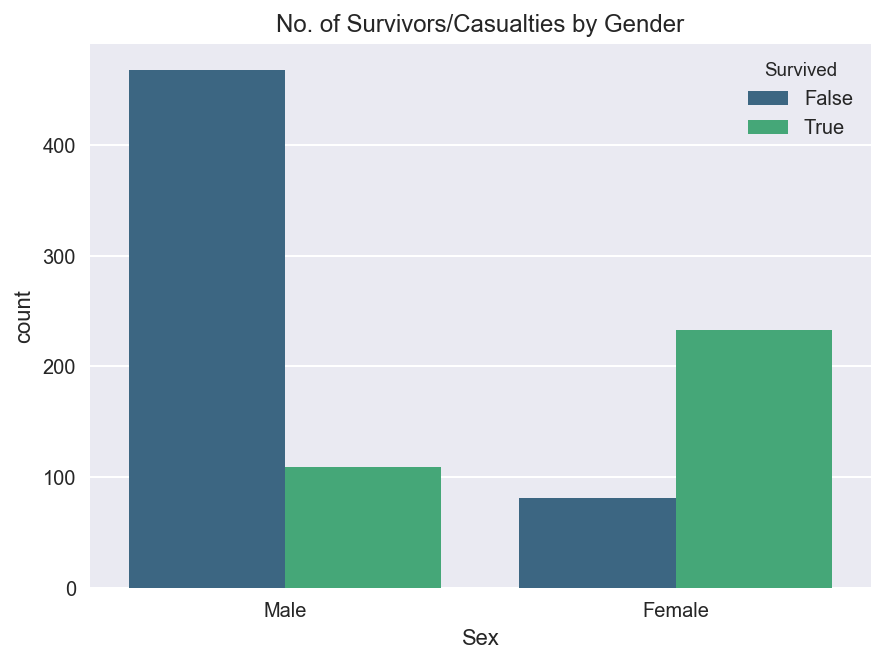

In [61]:
plt.figure(figsize=(7, 5))
sns.countplot('Sex', hue='Survived', data=titanic_df, palette='viridis');
plt.title('No. of Survivors/Casualties by Gender');

__Age.__ The "women and children first" protocol also seemed to have favoured the children, although not as much as expected. Slightly more than 50% of minors (age < 18) survived, as opposed to just short of 40% for adults. There are approximately six adults for each child in the dataset, so the weighted average is much closer to the adults' statistic.

To partition the variable `'Age'`, Pandas' `cut` function is used [1]. The second argument is a list containing the extremes of the intervals, in this case 0, 17, and 80, which is the largest age value in the dataset. If `right` `=` `True` (e.g. it is omitted), the intervals are left-open and right-closed. Hence, since no passenger's age is estimated to be 17.5, the first interval contains values up to and including 17, the second one values from 18 to 80.

In [62]:
age = pd.cut(titanic_df['Age'], [0, 17, titanic_df['Age'].max()])
titanic_df.pivot_table('Survived', index=age, margins=True)

,Survived
Age,
"(0.0, 17.0]",0.5398
"(17.0, 80.0]",0.3810
All,0.3838


The first bin, (0, 17], can be further broken down to display statistics for infants, kids up to 6 and 12, and young adults. It seems preference was given to kids aged 0-6, particularly to infants (almost nine in ten survived), while kids aged 7-12 happened to be the most vulnerable (only one in three made it).

A reasonable explanation might be that kids up to six constantly stayed with their parents or nanny, while those between seven and twelve probably did not, and got lost during evacuation. By contrast, young adults (13-17) were likely able to fend for themselves. Another explanation may be related to class membership, of which more is said later (see _Multi-Variable Relationships: Gender, Age, and Class_).

In [63]:
minors = pd.cut(titanic_df['Age'], [0, 1, 6, 12, 17])
titanic_df.pivot_table('Survived', index=minors)

,Survived
Age,
"(0, 1]",0.8571
"(1, 6]",0.6364
"(6, 12]",0.3182
"(12, 17]",0.4773


The different fortune of kids aged 0-6, 7-12, and 13-17 is visible in the bivariate distribution plot for binary variable `'Survived'` (x-axis) and `'Age'` (y-axis). The plots show a passenger's age conditional on whether the passenger made it (right) or not (left). It is clear how:

- almost no infant perished: the density on the left has no visible spot below 1;
- an effort was especially made to save kids aged 1-6 (darker spot in the lower part of the density on the right);
- fewer kids aged 7-12 survived (lighter area between the two darker ones in the density on the right);
- young adults aged 13-17 did considerably better than the previous category.

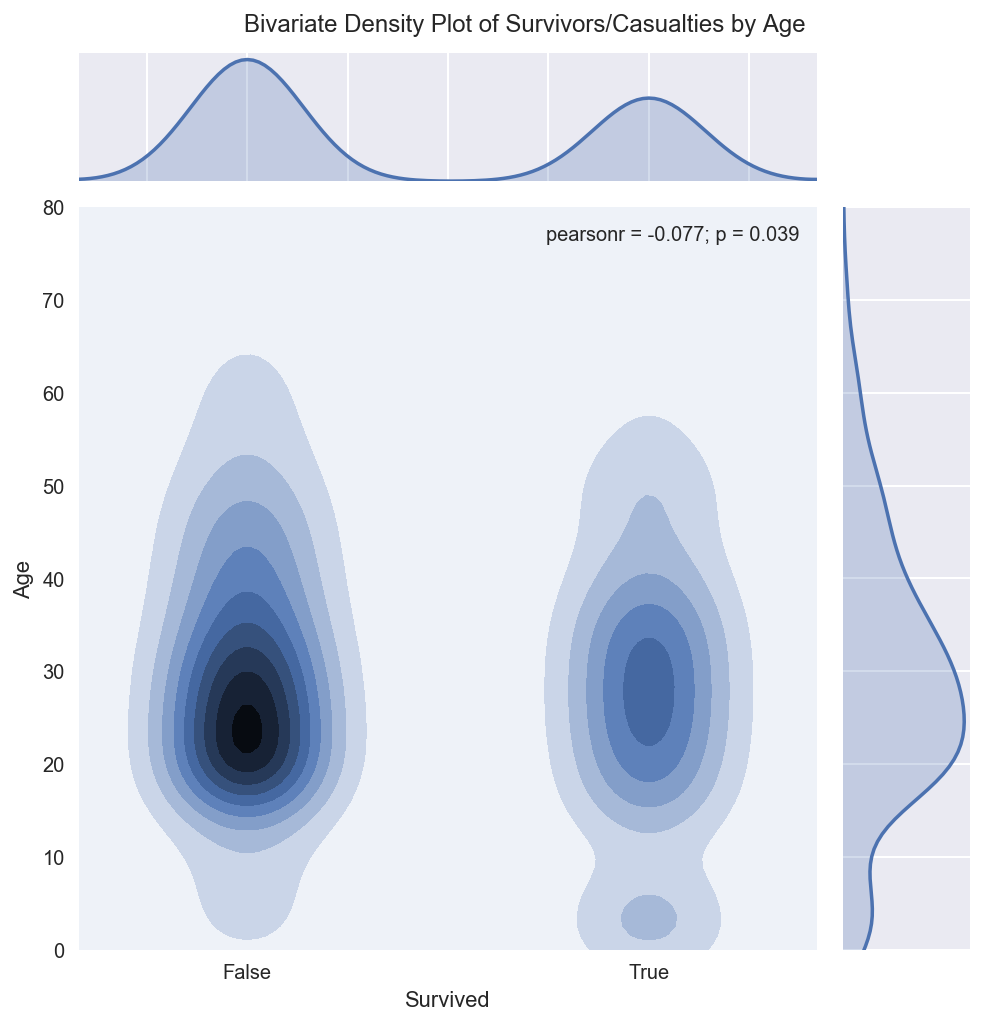

In [64]:
g = sns.jointplot('Survived', 'Age', data=titanic_df, kind='kde', 
              ylim=(0, 80), size=7);
plt.title('Bivariate Density Plot of Survivors/Casualties by Age', 
          x=-2.5, y=1.22);
g.ax_joint.set_xticklabels(['', '', 'False', '', '', '', 'True', '']);

One can further explore the relationship between age and survival by looking at the degree of association for binary variables `'Minor/Adult'` and `'Survival'`. The contingency table shows that association should not be too strong since, for each row, the data are roughly equally split between cells (372/229 for adults, 52/61 for minors).

In [65]:
pd.crosstab(titanic_df['Minor/Adult'], titanic_df['Survived'], margins=True)

Survived,False,True,All
Minor/Adult,,,
Adult,372,229,601
Minor,52,61,113
All,424,290,714


As a consequence, the numerator of the formula for $\phi$ is close to zero, resulting in phi coefficients of small magnitude (0.1180), a small chi-squared test statistic (9.94), and the null hypothesis of independence which cannot be rejected for significance levels below ~4%.

In [66]:
association('Minor/Adult', 'Survived', titanic_df, bias_correction=True)

Phi coefficient for binary variables 'Minor/Adult' == 'Adult' and 'Survived': -0.1180
Phi coefficient for binary variables 'Minor/Adult' == 'Minor' and 'Survived': 0.1180

Cramér's V for variables 'Minor/Adult' and 'Survived' (Bias-Corrected): 0.0913

Pearson's chi-squared test of independence:
Test statistic: 9.94
p-value: 4.1389e-02
Theoretical distribution:
          False      True    All
Adult  356.8964  244.1036  601.0
Minor   67.1036   45.8964  113.0
All    424.0000  290.0000  714.0


A similar conclusion is reached by looking at the plot of the relationship between the two variables. In particular, the bars for the `'Minor'` category are approximately equal in size, revealing that children did not benefit from the rule as expected.

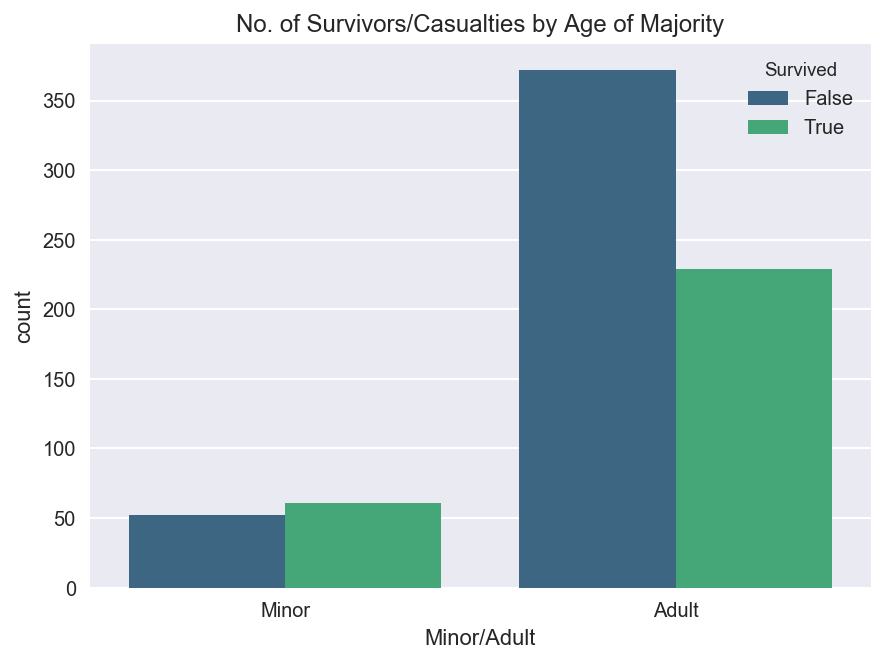

In [67]:
plt.figure(figsize=(7, 5))
sns.countplot('Minor/Adult', hue='Survived', data=titanic_df, 
              order=['Minor', 'Adult'], palette='viridis');
plt.title('No. of Survivors/Casualties by Age of Majority');

__Imputed Age.__ What happens if interpolated data points are included in the analysis? The survival rate for the (17, 80] age category drops to ~0.36 from ~0.38, but the difference is minimal, since the proportion of survivors to casualties in the additional subsample is practically the same.

In [68]:
imputed_age = pd.cut(titanic_df['Imputed Age'], [0, 17, titanic_df\
                                                 ['Imputed Age'].max()])
titanic_df.pivot_table('Survived', index=imputed_age, margins=True)

,Survived
Imputed Age,
"(0.0, 17.0]",0.5398
"(17.0, 80.0]",0.3612
All,0.3838


However, the additional subsample makes the bivariate density visually less informative. The peak (mode) of the imputed age distribution is now shifted to the mean value and it is much higher than before, so that a few areas previously displayed—such as those for kids aged 7-12—are now invisible. Yet, the darker spot corresponding to kids aged 0-6 who survived is still clearly distinguishable. In any case, it seems better to avoid using the `'Imputed Age'` variable.

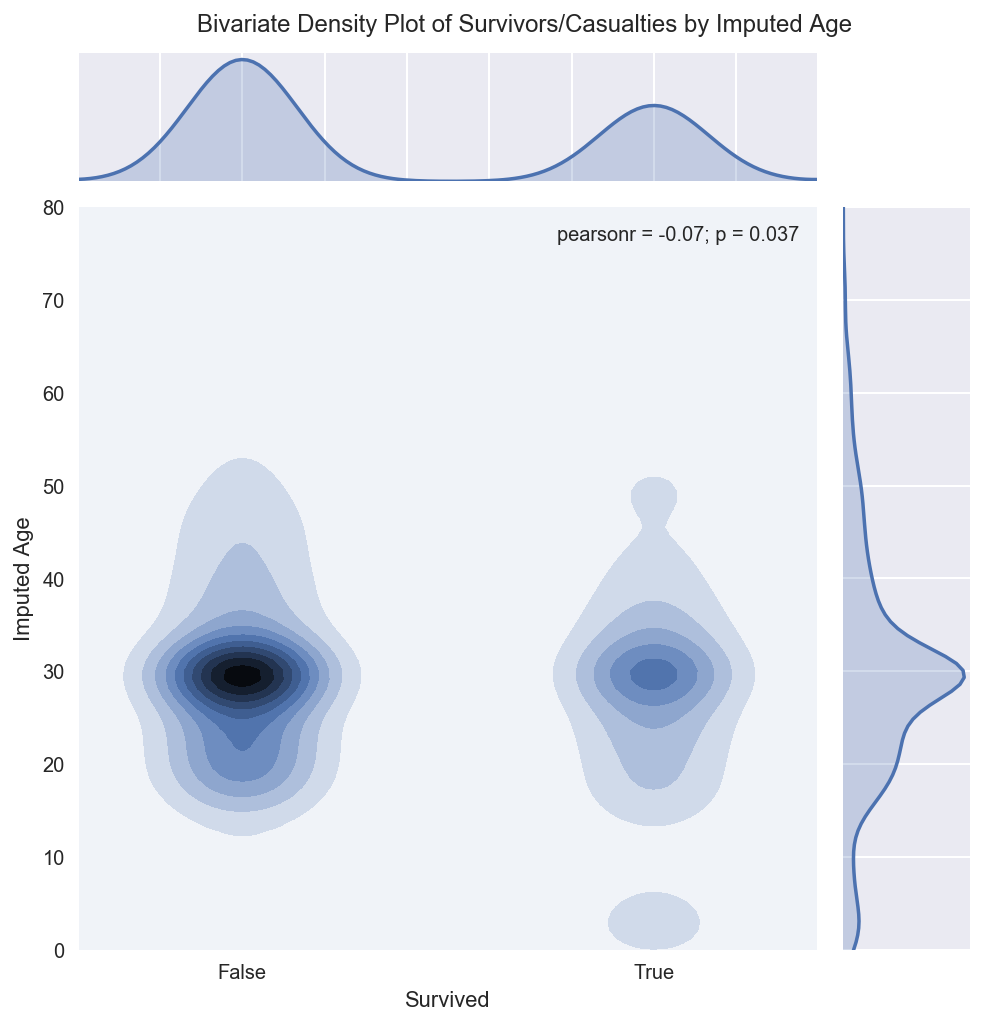

In [69]:
g = sns.jointplot('Survived', 'Imputed Age', data=titanic_df, kind='kde', 
                  ylim=(0, 80), size=7);
plt.title('Bivariate Density Plot of Survivors/Casualties by Imputed Age', 
          x=-2.5, y=1.22);
g.ax_joint.set_xticklabels(['', '', 'False', '', '', '', '', 'True', '']);

__Passenger Class.__ Class membership seems to have greatly affected the survival rate. Approximately two in three first class passengers survived, while only one in two second class, and one in four third class passengers made it. 

Apart from the likely preference given to upper class members, one reason could be the favourable cabin placement inside the Titanic (more on this later).

In [70]:
titanic_df.pivot_table('Survived', index='Passenger Class', margins=True)

,Survived
Passenger Class,
First,0.6296
Second,0.4728
Third,0.2424
All,0.3838


The contingency table provides additional evidence on the favourable treatment of first (80 perished/136 survived) and second class (97 perished/87 survived) passengers, as opposed to third class ones (372 perished/119 survived).

In [71]:
pd.crosstab(titanic_df['Passenger Class'], titanic_df['Survived'], 
            margins=True)

Survived,False,True,All
Passenger Class,,,
First,80,136,216
Second,97,87,184
Third,372,119,491
All,549,342,891


Cramér's V for `'Passenger Class'` and `'Survived'` is quite large (~0.33), showing association between variables. Moreover, the null hyothesis of independence can be safely rejected at any plausible significance level (p-value ≈ 0).

In [72]:
association('Passenger Class', 'Survived', titanic_df, bias_correction=True)

Cramér's V for variables 'Passenger Class' and 'Survived' (Bias-Corrected): 0.3299

Pearson's chi-squared test of independence:
Test statistic: 102.89
p-value: 6.2585e-20
Theoretical distribution:
           False      True    All
First   133.0909   82.9091  216.0
Second  113.3737   70.6263  184.0
Third   302.5354  188.4646  491.0
All     549.0000  342.0000  891.0


In [73]:
sorted_classes = ['First', 'Second', 'Third']

The relative size of the green bars in the count plot also reveals that priority was definitely given to upper class passengers.


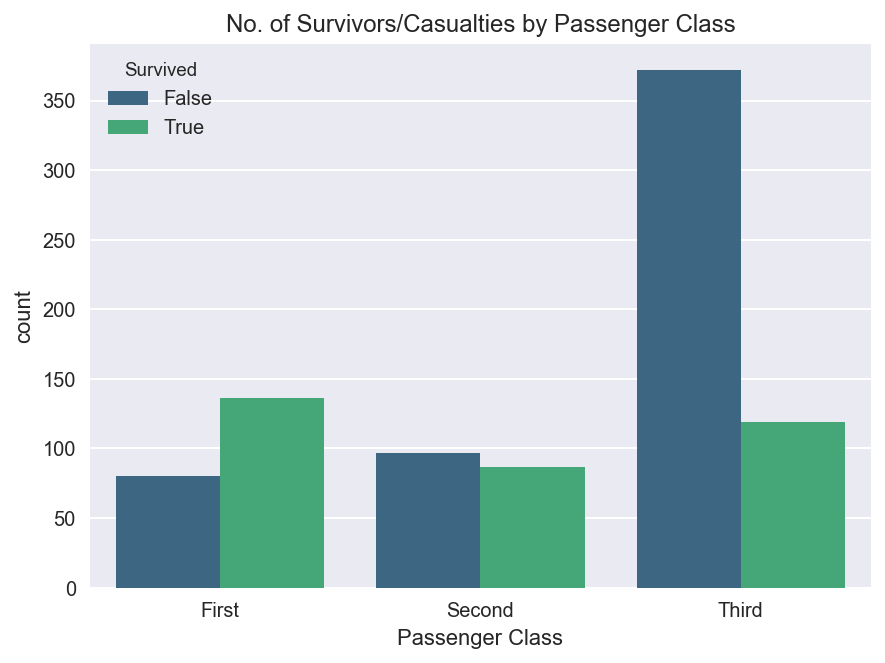

In [74]:
plt.figure(figsize=(7, 5))
sns.countplot('Passenger Class', hue='Survived', data=titanic_df, 
              order=sorted_classes, palette='viridis');
plt.title('No. of Survivors/Casualties by Passenger Class');

__Deck Placement.__ Could cabin placement alone help explain survival rate? Perhaps passengers closer to the Boat deck could have effortlessly reached the lifeboats on time, thus improving their chance of survival. Unfortunately, the large number of unknown data points makes inference very difficult (also see the contingency table below).

The `.reindex` function allows to resort deck names in order to place `'Boat'` at the top of the chart, see [this post](https://stackoverflow.com/questions/38462920/pandas-keyerror-value-not-in-index). A Seaborn `factorplot` of survival conditional on deck placement (with unknown data points dropped) is available in the [Seaborn API documentation](https://seaborn.pydata.org/generated/seaborn.factorplot.html#seaborn.factorplot).

In [75]:
sorted_decks = ['Boat','A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']

In [76]:
titanic_df.pivot_table('Survived', columns = 'Deck').reindex(columns=sorted_decks)

Deck,Boat,A,B,C,D,E,F,G,Unknown
Survived,0.0,0.4667,0.7447,0.5932,0.7576,0.75,0.6154,0.5,0.2999


The contingency table reveals how meaningless it is to look for any linear relationship between variables `'Deck'` and `'Survived'`: too few available data points, too many unknown ones.

In [77]:
pd.crosstab(titanic_df['Deck'], titanic_df['Survived'], margins=True)\
.reindex(index=sorted_decks)

Survived,False,True,All
Deck,,,
Boat,1,0,1
A,8,7,15
B,12,35,47
C,24,35,59
D,8,25,33
E,8,24,32
F,5,8,13
G,2,2,4
Unknown,481,206,687


Cramér's V and the p-value for Pearson's test of independence may also be heavily biased due to the large number of unknown observations. The relationship they point at might well be spourious.

In [78]:
association('Deck', 'Survived', titanic_df, bias_correction=True)

Cramér's V for variables 'Deck' and 'Survived' (Bias-Corrected): 0.3019

Pearson's chi-squared test of independence:
Test statistic: 99.16
p-value: 3.1504e-13
Theoretical distribution:
            False      True    All
A          9.2424    5.7576   15.0
B         28.9596   18.0404   47.0
Boat       0.6162    0.3838    1.0
C         36.3535   22.6465   59.0
D         20.3333   12.6667   33.0
E         19.7172   12.2828   32.0
F          8.0101    4.9899   13.0
G          2.4646    1.5354    4.0
Unknown  423.3030  263.6970  687.0
All      549.0000  342.0000  891.0


#### B. Multi-Variable Relationships
The principal multi-variable relationships are now explored.

__Gender, Age, and Class.__ Regrouping by sex and then age on rows, and on passenger class on colums, reveals that, on average:

- Regardless of age, females received a better treatment than males did;
- Regardless of both age and gender, class membership seems to have played an important role in allowing survival. The most penalised were third class passengers, with average survival rates dropping by half for females, and by up to four-fifths for males;
- Regardless of class, adult males were the direst hit, with only one-third of first class passengers, and only one-tenth of second and third class passengers to survive.

In [79]:
titanic_df.pivot_table('Survived', index=['Sex', age], 
                       columns='Passenger Class')

Passenger Class       First  Second   Third
Sex    Age                                 
Female (0.0, 17.0]   0.8750  1.0000  0.5429
       (17.0, 80.0]  0.9740  0.9032  0.4179
Male   (0.0, 17.0]   1.0000  0.8182  0.2326
       (17.0, 80.0]  0.3711  0.0682  0.1333

The three dimensions, and their relationship to the survival rate, can be visually explored using multiple Seaborn plots ([see API documentation](https://seaborn.pydata.org/api.html)).

The first graph is a `factorplot` in which each subplot is a swarm. In each subplot, `'Sex'` and `'Age'` are, respectively, the variables on the x- and y- axes, while `'Passenger Class'` the variable on the z-axis (`col`). The `hue`—the comparison variable—is again whether the passenger survived or not.

Green dots denote surviving passengers. It is clear from the plots how the overwhelming majority of first and second class females of all ages made it, and how, instead, about half of third class females did not. It also appears that, for this latter category, age alone did not matter much. It is perhaps also curious that the youngest first class female passenger perished, while the oldest third class one survived.

Blue dots denote non-surviving passengers. It is evident how half of first class passengers, as well as the vast majority of second and third class male passengers did not make it. However, it appears that being young might have helped increase the survival rate regardless of the class of membership, but only for kids approximately ten or younger (the data are sharply split down this line).

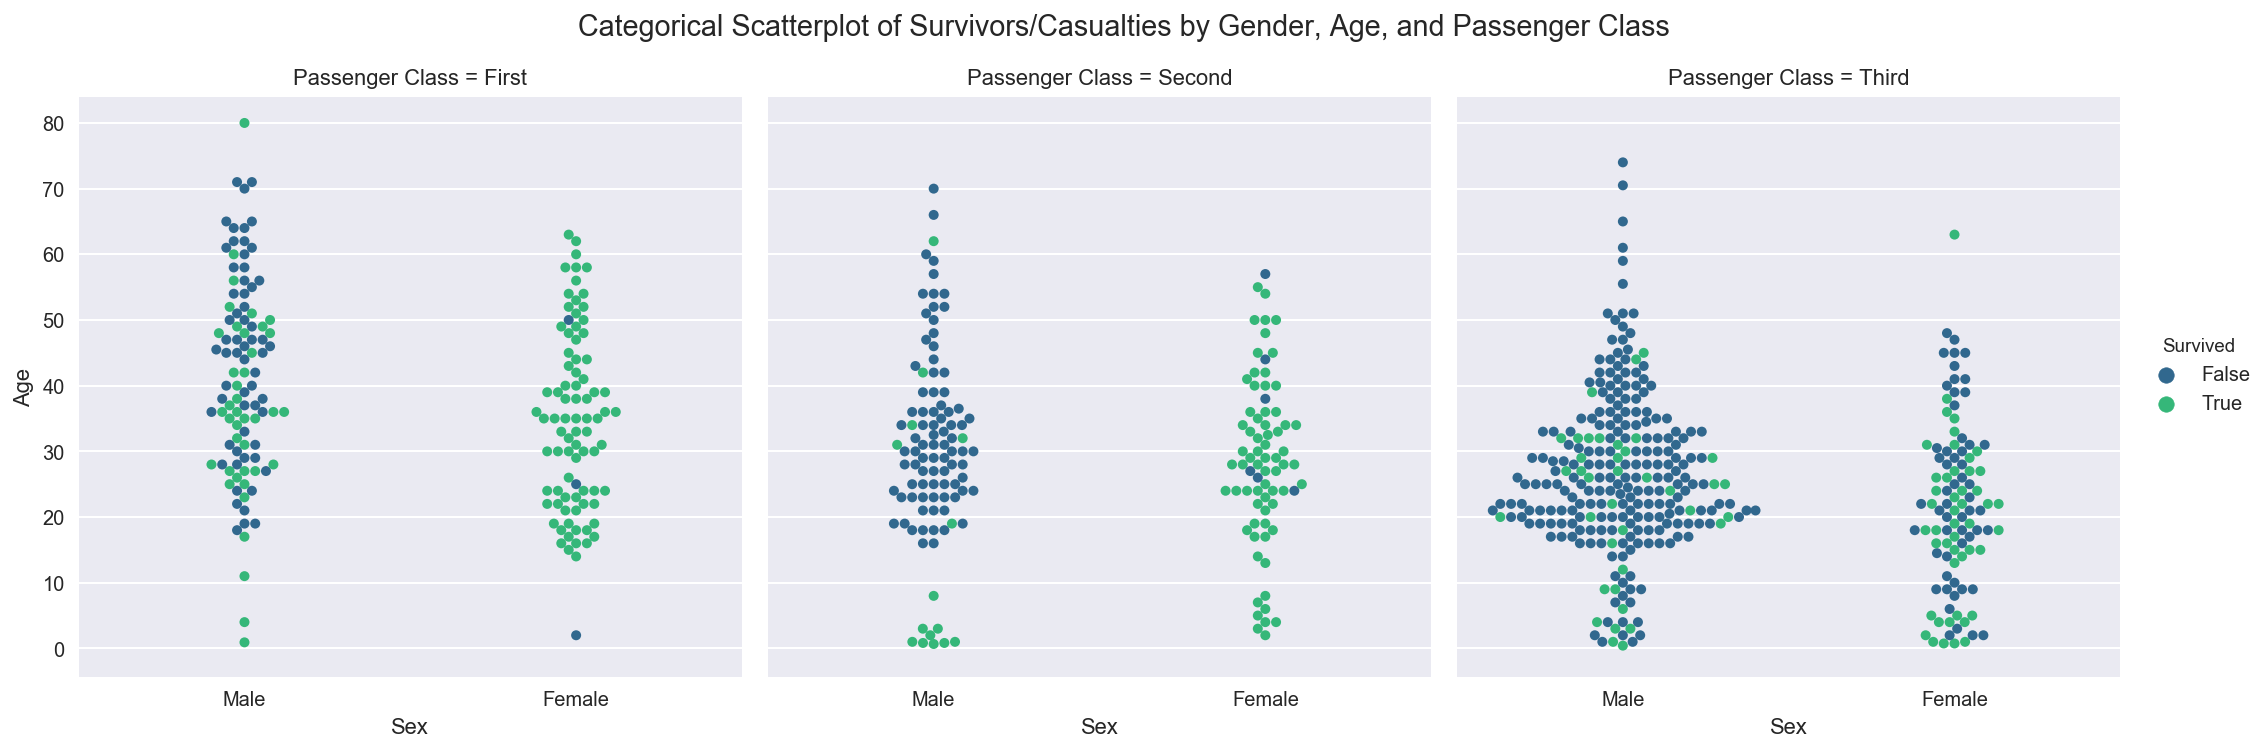

In [80]:
sns.factorplot(x='Sex', y='Age', hue='Survived', col='Passenger Class', 
               data=titanic_df, kind='swarm', col_order=sorted_classes, size=5, 
               palette='viridis').fig.suptitle('Categorical Scatterplot of \
Survivors/Casualties by Gender, Age, and Passenger Class', y=1.04);

The second graph is a `factorplot` in which each subplot is a violin. A violin is a hybrid of boxplot and kernel density estimate. The box part, in this case, shows the quartiles of the distributions, the KDE part the density itself. Both are mirrored across the vertical axis. `cut = 0` limits the distribution within the range of the observed data; `scale = 'count'` scales the violins by the number of observations in the bins (thinner violins have a smaller number of data points, as opposed to fatter ones), and `inner = 'quartile'` draws the quartiles of the distribution instead of a miniature boxplot.

For females, the median age of survival was around 30-35 for first and second class passengers, and short of 20 for third class ones. The dispersion, however, is much greater for first class females, reflecting the effort to save them at all ages. Older third class females, instead, were largely sacrificed. Also notice the width of the violins which, as previously said, are scaled by the number of data points in the samples: almost no first class and second class female perished, but a lot of third class ones did.

For males, the median age of survival was around 35, less than 5, and around 25 for, respectively, first, second, and third class passengers. However, the green violins are generally much thinner than their blue counterparts—almost invisible for second and third class members—and extend to the bottom part of the plots, to show that, in theory, an effort to save kids was made.

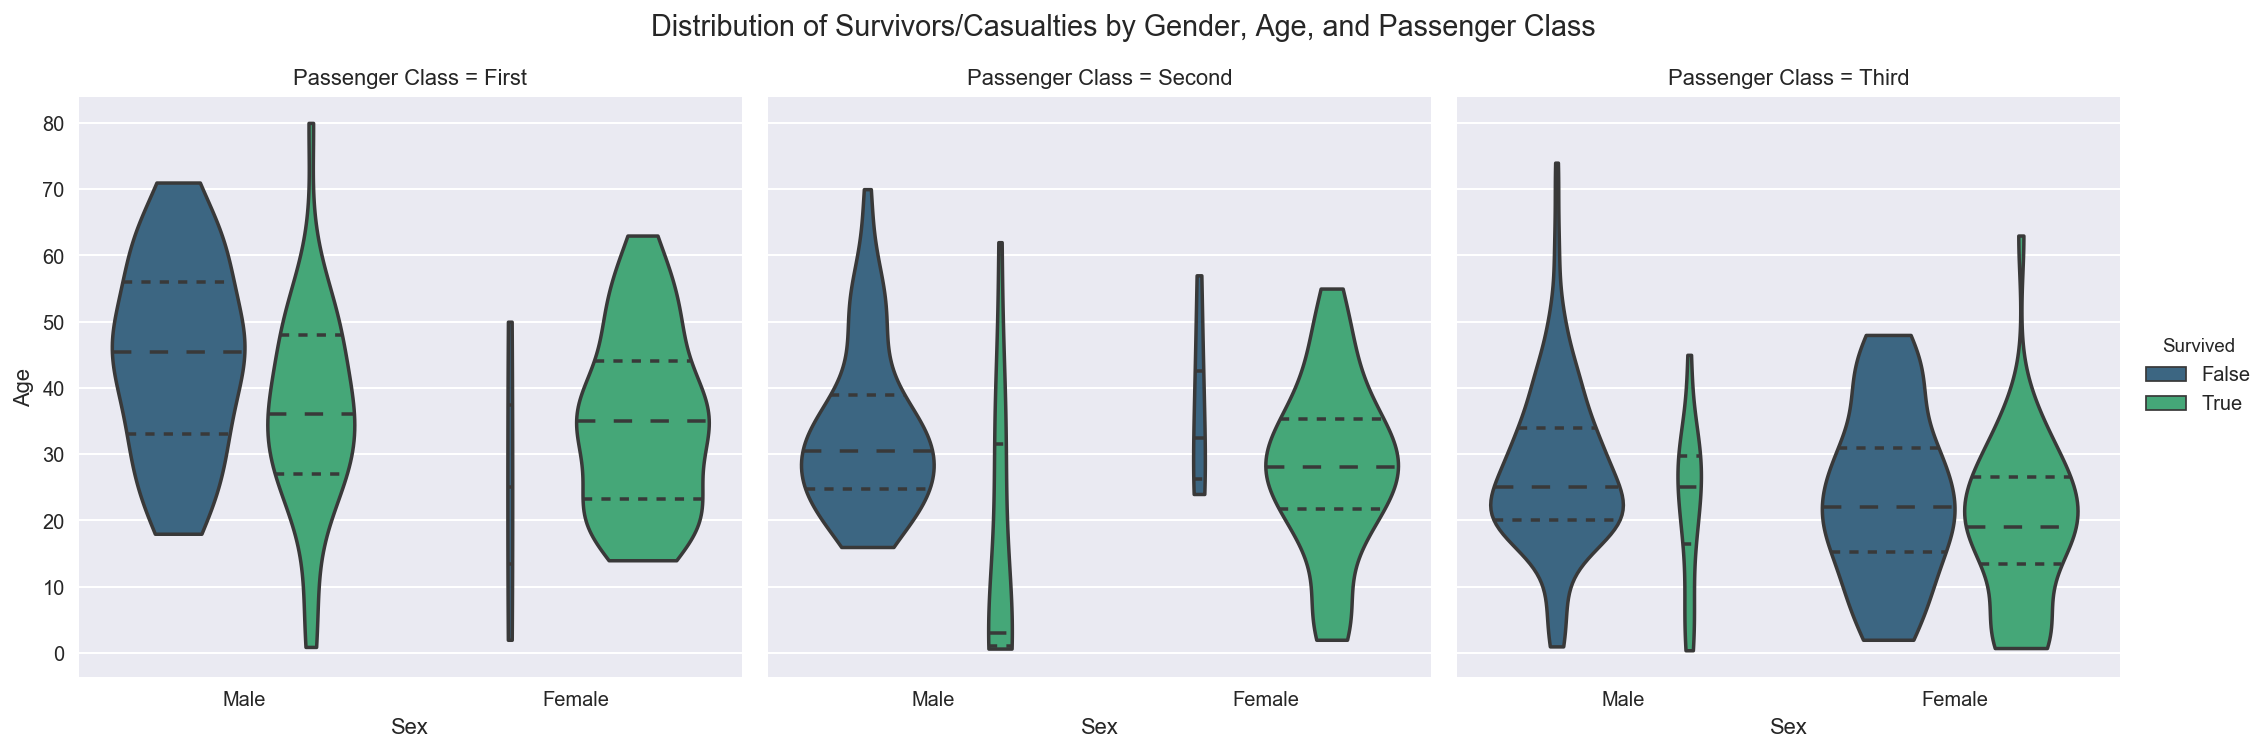

In [81]:
sns.factorplot(x='Sex', y='Age', hue='Survived', col='Passenger Class', 
               data=titanic_df, kind='violin', cut=0, scale='count', 
               inner='quartile', col_order=sorted_classes, jitter=True, size=5, 
               palette='viridis').fig.suptitle('Distribution of \
Survivors/Casualties by Gender, Age, and Passenger Class', y=1.04);

__Passenger Class, Age, and Deck Placement.__ As explained before, the large number of missing data points makes a relationship between deck placement and survival very difficult to spot. Moreover, passenger class, age, and gender appear to be much more strongly correlated to the latter variable.

What can be safely said, based on information external to the dataset, is that, perhaps, passengers on decks F and G might have found it hard to escape. However, the _South China Morning Post_ article shows how deck placement intertwines with class membership:

__Table 2: Cabin Placement on the Titanic__

No.|Deck|Description|First|Second|Third
:-|:-|:-|:-:|:-:|:-:
 |Boat|Cabin "T", first class.|$\checkmark$||
A|Promenade|First class cabins.|$\checkmark$||
B|Bridge|First class cabins and millionaires' suites.|$\checkmark$||
C|Shelter|First class cabins.|$\checkmark$||
D|Saloon|First and second class cabins.|$\checkmark$|$\checkmark$|
E|Upper|Mostly first and second class cabins.|$\checkmark$|$\checkmark$|$\checkmark$
F|Middle|Second and third class cabins.||$\checkmark$|$\checkmark$
G|Lower|Third class cabins, storage area, and engine rooms.|||$\checkmark$
 |Orlop|Storage area.|||
 |Tank top|Engine and boiler rooms.|||

There was no second class cabin until deck D, and no third class one until deck E, but mostly on decks F and G. Data exploration validates these findings.

The difficulty to disentangle the effect of deck placement from those of the other variables in explaining survival is apparent in the plots below, in which `'Passenger Class'`, `'Age'`, and `'Deck'` are, respectively, on the x-, y-, and z- axes. From the graphs, one can infer that:

- No second class data point appears before deck D, and no third class data point before deck E;
- There is only one point in the first subplot: it is Mr Stephen Weart Blackwell, who perished in the shipwreck;
- Regardless of deck placement, it seems first class passengers generally received a privileged treatment. Moreover, very few first class data points are missing, and less than half of them are blue;
- Most second and third class data points are missing. Of the first category, approximately half are blue; of the second, the majority. Gender, age, passenger class, and deck placement might all offer some reasonable explanation.
- For first and second class passengers, it seems age also played an important role, since kids fifteen or younger—regardless of deck placement—were generally spared.

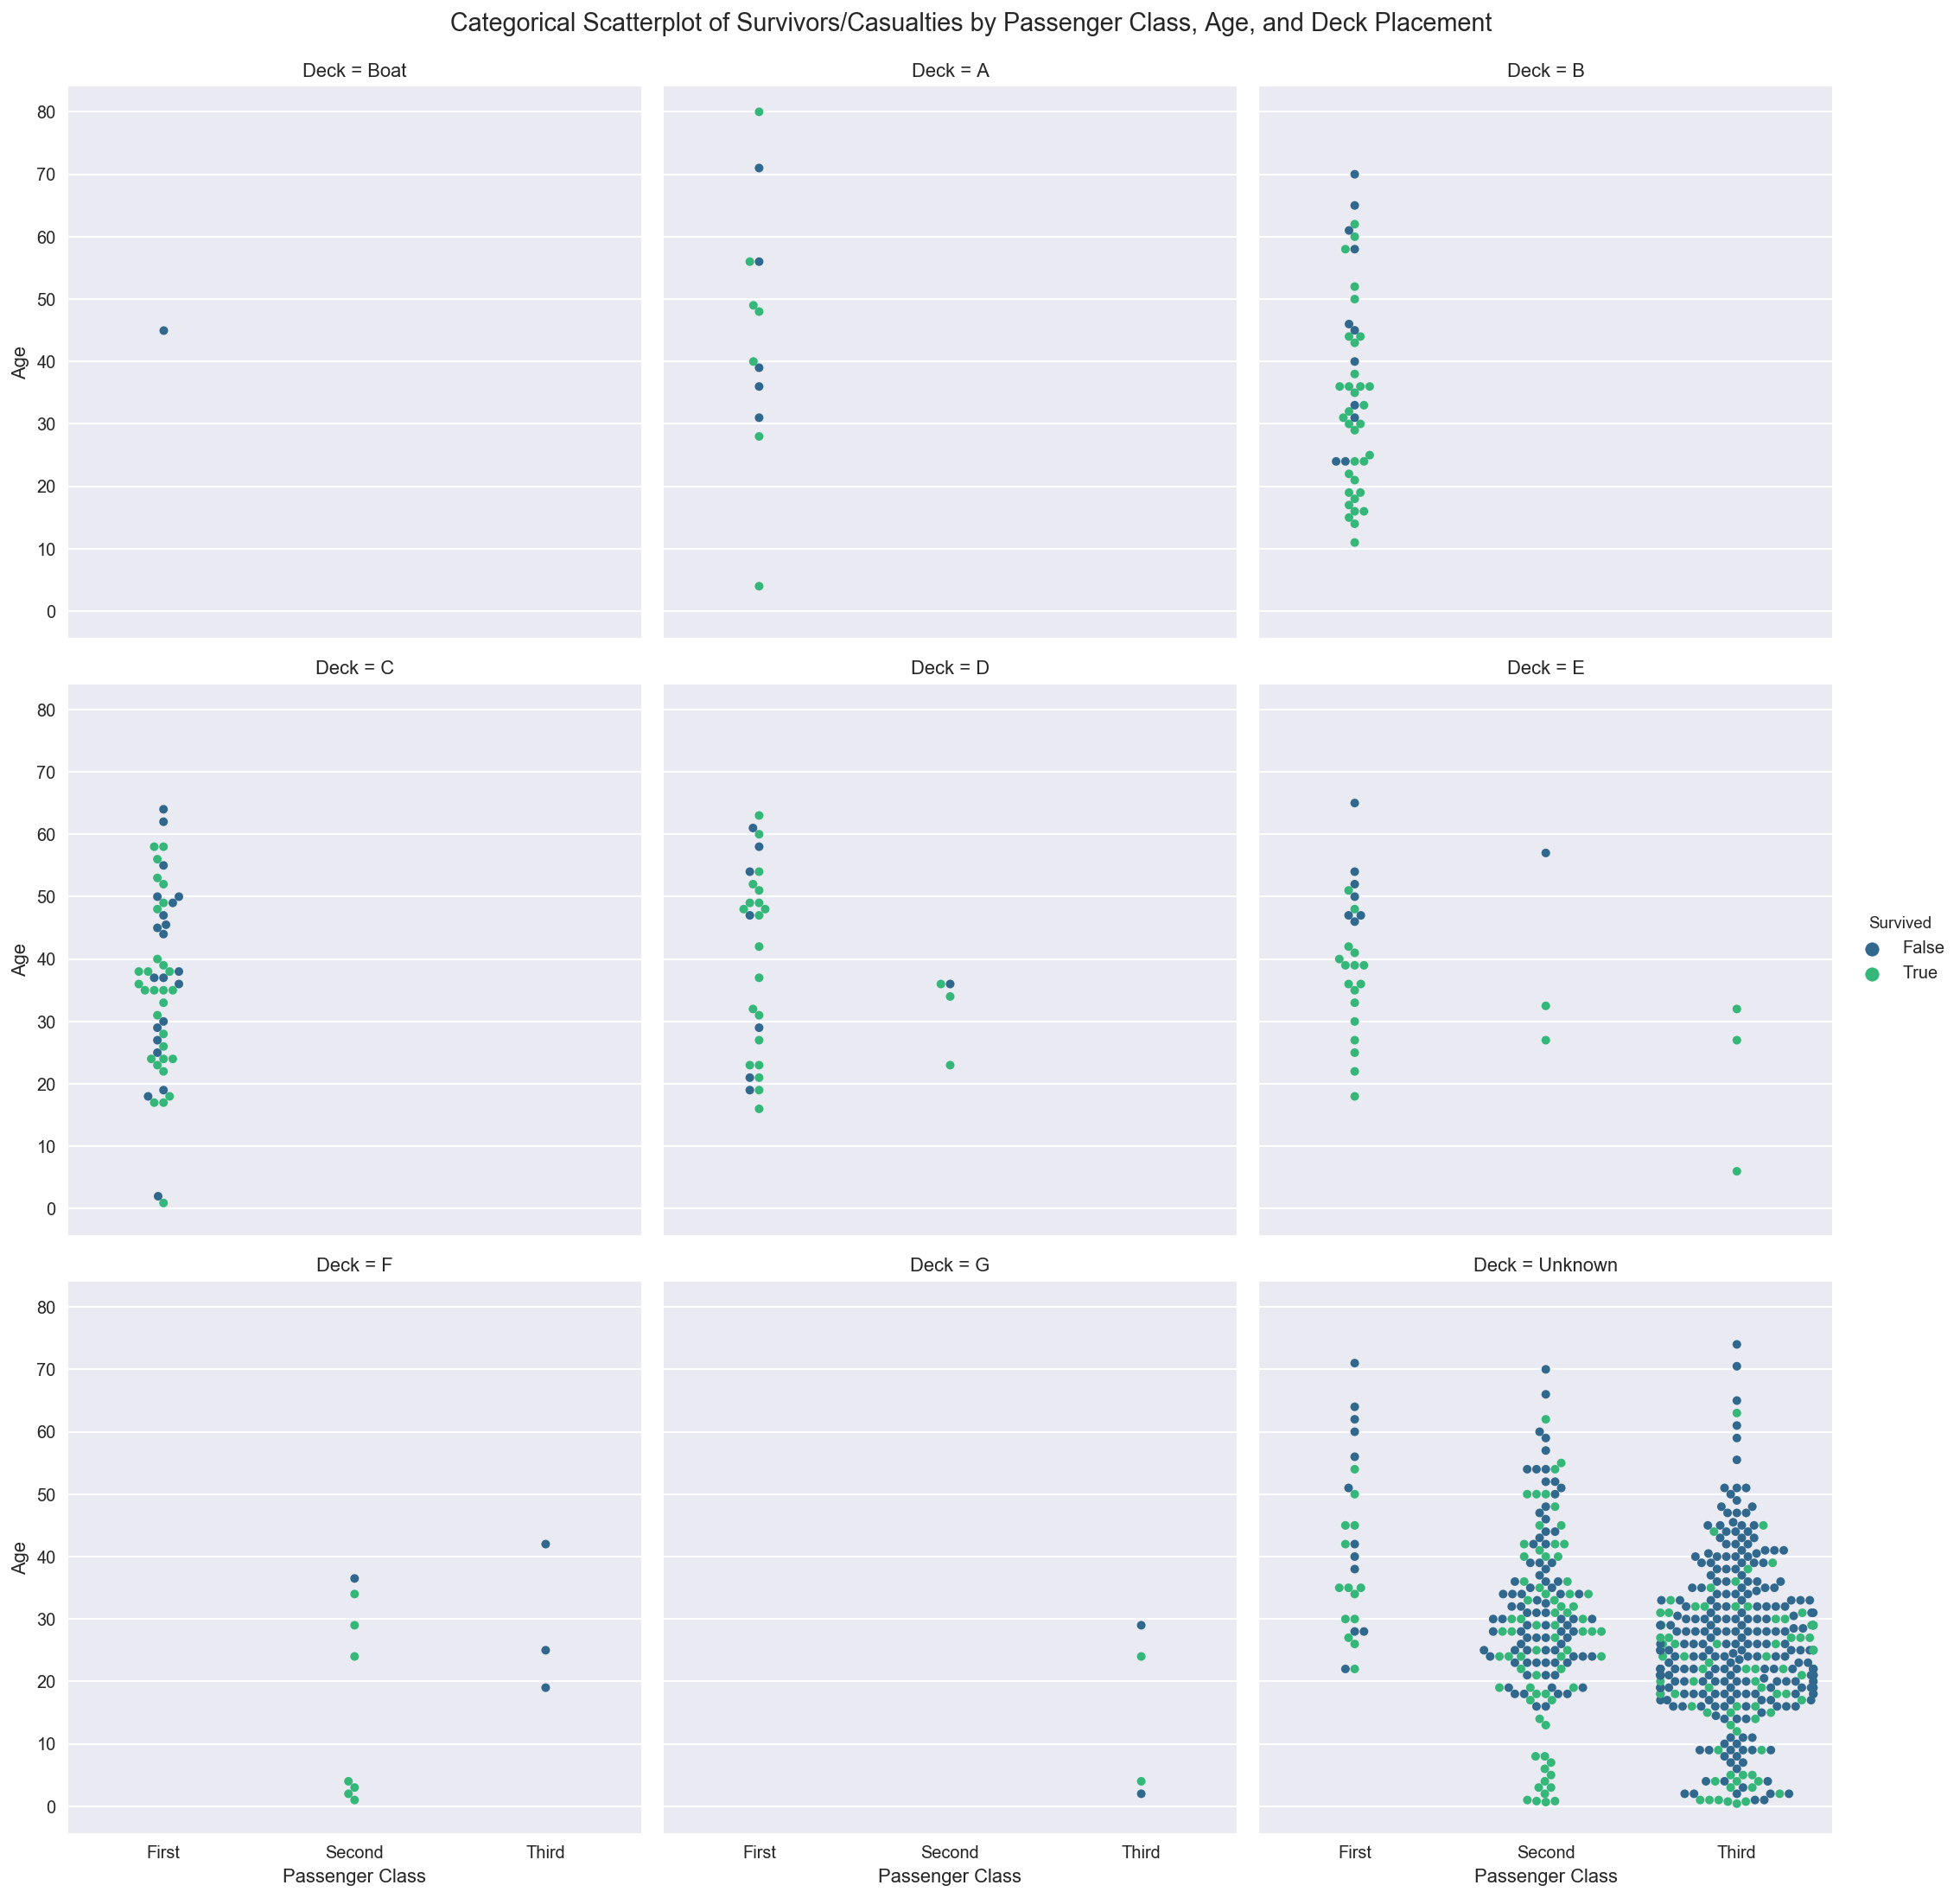

In [82]:
sns.factorplot(x='Passenger Class', y='Age', hue='Survived', col='Deck', 
               data=titanic_df, kind='swarm', order=sorted_classes, 
               col_order=sorted_decks, col_wrap=3, size=5, palette='viridis')\
                .fig.suptitle('Categorical Scatterplot of Survivors/Casualties \
by Passenger Class, Age, and Deck Placement', y=1.015);

#### 2. Additional Factors: Title, Family Size, Fare, Port of Embarkation

#### A. Single-Variable Relationships

__Title.__ Is there any correlation between honorifics and survival? Three dimensions are particularly relevant:

- __Being married to another Titanic passenger__: did the presence of a spouse aboard increase the chance of survival? Perhaps spouses tried everything they could to help each other, or to save their other half;

- __Being highly educated__: did higher education (i.e. being a Doctor) help a passenger survive? Possibly, Doctors were needed on lifeboats;

- __Having a religious style__: did being part of a religious order (i.e. being a Reverend) hinder survival? Maybe Reverends gladly sacrificed themselves to let more people live.

The sign, if not the magnitude, of the phi coefficients seems to hint at the desired relationships. Unfortunately, the results of Pearson's test of independence reveal that the figures are _not statistically significant at any reasonable level_ (<10%). In any case:

__a. Being Married to Another Titanic Passenger.__ The association between _presence of a spouse aboard_ and _survival_ is positive (~0.09), although the null hypothesis of independence cannot be rejected for $\alpha$ < 0.15. It seems that husbands and wives tried their best to save the other half—a theory also supported by the difference in frequency between the actual (38 perished/41 survived) and theoretical (49 perished/30 survived) distributions in the contingency table;

In [83]:
pd.crosstab(titanic_df['Spouse Aboard'], titanic_df['Survived'], margins=True)

Survived,False,True,All
Spouse Aboard,,,
False,511,301,812
True,38,41,79
All,549,342,891


In [84]:
association('Spouse Aboard', 'Survived', titanic_df, bias_correction=True)

Phi coefficient for binary variables 'Spouse Aboard' == 'False' and 'Survived': -0.0867
Phi coefficient for binary variables 'Spouse Aboard' == 'True' and 'Survived': 0.0867

Cramér's V for variables 'Spouse Aboard' and 'Survived' (Bias-Corrected): 0.0550

Pearson's chi-squared test of independence:
Test statistic: 6.69
p-value: 1.5293e-01
Theoretical distribution:
          False      True    All
False  500.3232  311.6768  812.0
True    48.6768   30.3232   79.0
All    549.0000  342.0000  891.0


__b. Being Highly Educated.__ The association between _being a Doctor_ and _survival_ is positive although almost inexistent (<0.01), and the null hypothesis of independence cannot be rejected for any $\alpha$. It seems no extra effort was made to save Doctors, perhaps because there were no medicines on lifeboats. Another possible explanation might be that gender, age, and class had a stronger impact on survival. Moreover, the sample of Doctors on the Titanic might be too small to draw valid conclusions (in fact, Yates' correction for continuity was used). Actual (contingency table, omitted) and theoretical distribution tend to agree;

In [85]:
association('Higher Education', 'Survived', titanic_df, yates_correction=True, 
            bias_correction=True)

Phi coefficient for binary variables 'Higher Education' == 'False' and 'Survived': -0.0082
Phi coefficient for binary variables 'Higher Education' == 'True' and 'Survived': 0.0082

Cramér's V for variables 'Higher Education' and 'Survived' (Bias-Corrected): 0.0000

Pearson's chi-squared test of independence:
Test statistic: 0.06
p-value: 9.9956e-01
Theoretical distribution:
          False      True    All
False  544.6869  339.3131  884.0
True     4.3131    2.6869    7.0
All    549.0000  342.0000  891.0


__c. Having a Religious Style.__ The association between _having a religious title_ and _survival_ is negative (-0.065) as expected (no Reverend in the dataset survived), although the null of independence cannot be rejected for any reasonable level of significance (i.e. for $\alpha$ < 0.40); it is possible that Reverends simply put their lives in the hands of God and sacrificed themselves to let other passengers live, or that, being all second-class males, they were left onboard; whatever the real explanation, 0 out of 6 (actual distribution from the contingency table), as opposed of 2 out of 6 (theoretical distribution) survived;

In [86]:
pd.crosstab(titanic_df['Religious Title'], titanic_df['Survived'], 
            margins=True)

Survived,False,True,All
Religious Title,,,
False,543,342,885
True,6,0,6
All,549,342,891


In [87]:
association('Religious Title', 'Survived', titanic_df, yates_correction=True, 
            bias_correction=True)

Phi coefficient for binary variables 'Religious Title' == 'False' and 'Survived': 0.0650
Phi coefficient for binary variables 'Religious Title' == 'True' and 'Survived': -0.0650

Cramér's V for variables 'Religious Title' and 'Survived' (Bias-Corrected): 0.0000

Pearson's chi-squared test of independence:
Test statistic: 3.76
p-value: 4.3902e-01
Theoretical distribution:
         False     True    All
False  545.303  339.697  885.0
True     3.697    2.303    6.0
All    549.000  342.000  891.0


__Family Size.__ Are family size and survival related to each other? There seems to be a statistically significant association between the two variables. Cramér's V is not too small (~0.27) and p-value ≈ 0.

In [88]:
association('Family Size', 'Survived', titanic_df, bias_correction=True)

Cramér's V for variables 'Family Size' and 'Survived' (Bias-Corrected): 0.2653

Pearson's chi-squared test of independence:
Test statistic: 80.67
p-value: 6.5341e-10
Theoretical distribution:
        False      True    All
1    330.8788  206.1212  537.0
2     99.2020   61.7980  161.0
3     62.8485   39.1515  102.0
4     17.8687   11.1313   29.0
5      9.2424    5.7576   15.0
6     13.5556    8.4444   22.0
7      7.3939    4.6061   12.0
8      3.6970    2.3030    6.0
11     4.3131    2.6869    7.0
All  549.0000  342.0000  891.0


The relationship is better explored using both a pivot table and a countplot. The most interesting data are for single passengers and for those travelling with small families (2-4 people). Of _single passengers_, who were the majority onboard, only one out of three survived; of _small families_, most of them. The latter were likely composed of two spouses (as analysed before), couples with one or two children, siblings, or a combination of the above. These all have certainly tried to help each other and, in particular, four-people families seem to have done the best job, with an average survival rate of ~73%.

However, both the strict application of the "women and children first" protocol and class membership may have injected bias in the results.

In [89]:
titanic_df.pivot_table('Survived', index='Family Size').T

Family Size,1,2,3,4,5,6,7,8,11
Survived,0.3035,0.5528,0.5784,0.7241,0.2,0.1364,0.3333,0.0,0.0


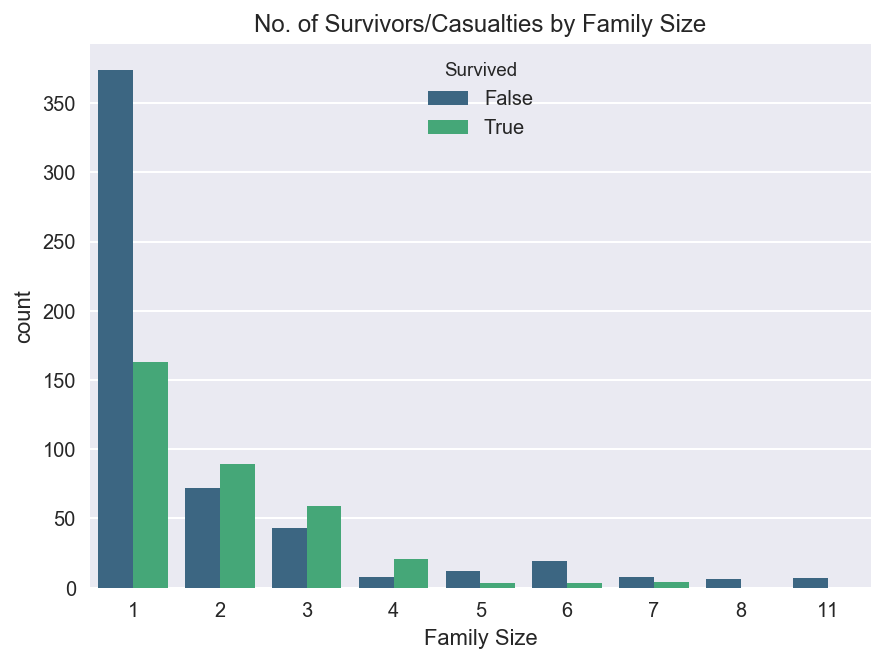

In [90]:
plt.figure(figsize=(7, 5))
sns.countplot('Family Size', hue='Survived', data=titanic_df, 
              palette='viridis');
plt.title('No. of Survivors/Casualties by Family Size');

__Fare.__ Is the amount spent for the trip related to survival? To answer this question, the range of values in the `'Fare Per Person'` column is split into four quartiles using Pandas' _quantile-based discretisation function_ `qcut` [1].

It seems the two variables are positively associated: the average conditional survival rate improves for those who spent more than 50% and 75% of all passengers. The amount paid is clearly linked with both class membership (higher classes generally spent more) and deck placement (bigger spenders were generally placed closer to the Boat deck, for instance on decks B-C).

In [91]:
fare_per_person = pd.qcut(titanic_df['Fare Per Person'],  4)
titanic_df.pivot_table('Survived', fare_per_person)

,Survived
Fare Per Person,
"(-0.001, 7.23]",0.2949
"(7.23, 8.05]",0.2436
"(8.05, 13.86]",0.4080
"(13.86, 221.78]",0.6036


__Port of Embarkation.__ How do port of embarkation and survival relate? The pivot table reveals that as many as 55% of passengers who boarded in Cherbourg, and as little as 33% of passengers who embarked in Southampton, survived.

In [92]:
titanic_df.pivot_table('Survived', 'Port of Embarkation', margins=True)

,Survived
Port of Embarkation,
Cherbourg,0.5536
Queenstown,0.3896
Southampton,0.3390
All,0.3838


Cramér's V is moderate (~0.15) and statistically significant (p-value ≈ 0), revealing that an association between the two variables exists.

In [93]:
association('Port of Embarkation', 'Survived', titanic_df, 
            bias_correction=True)

Cramér's V for variables 'Port of Embarkation' and 'Survived' (Bias-Corrected): 0.1497

Pearson's chi-squared test of independence:
Test statistic: 25.96
p-value: 2.2606e-04
Theoretical distribution:
                False      True    All
Cherbourg    103.5152   64.4848  168.0
Queenstown    47.4444   29.5556   77.0
Southampton  398.0404  247.9596  646.0
All          549.0000  342.0000  891.0


However, a closer inspection of the relationship reveals that class membership might have played a much more important role in survival: Cherbourg has the largest ratio of first class passengers to total (85/168, or ~51%), and the lowest ratio of third class passengers to total (17/168, or ~39%). The opposite applies to Queenstown. Moreover, Southampton has the largest absolute number of third class passengers in the dataset (353).

In [94]:
pd.crosstab(titanic_df['Port of Embarkation'], titanic_df['Passenger Class'], 
            margins=True)

Passenger Class,First,Second,Third,All
Port of Embarkation,,,,
Cherbourg,85,17,66,168
Queenstown,2,3,72,77
Southampton,129,164,353,646
All,216,184,491,891


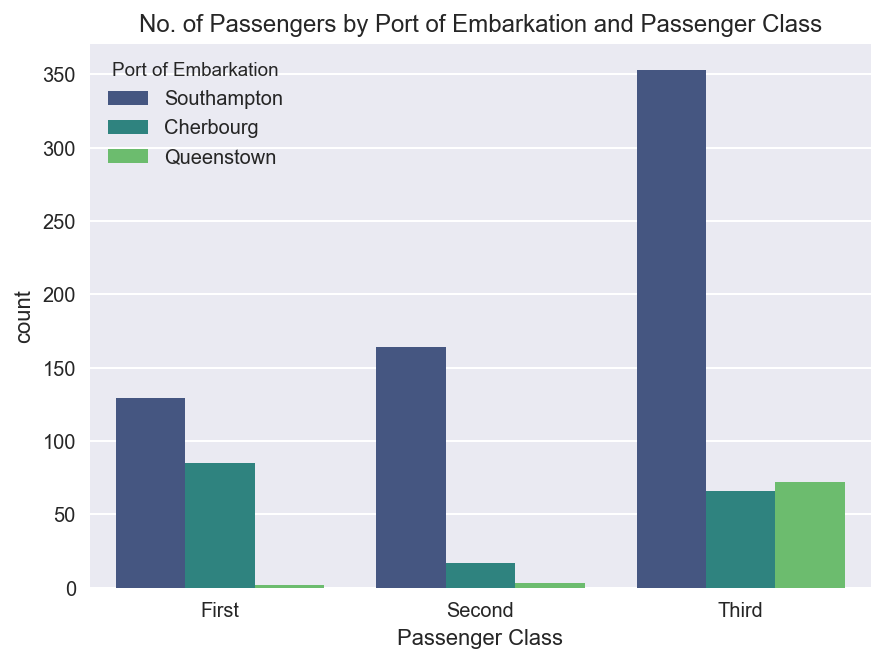

In [95]:
plt.figure(figsize=(7, 5))
sns.countplot('Passenger Class', hue='Port of Embarkation', data=titanic_df, 
              order=sorted_classes, palette='viridis');
plt.title('No. of Passengers by Port of Embarkation and Passenger Class');

### Socio-Economic Status

#### In Which Proportion Did First, Second, and Third Class Passengers Board the Titanic?

First and second class passengers boarded the Titanic roughly in the same proportion (~20-25%), third class passengers were about 55%.

In [96]:
titanic_df['Passenger Class'].value_counts().reindex(sorted_classes) / \
len(titanic_df['Passenger Class'])

First     0.2424
Second    0.2065
Third     0.5511
Name: Passenger Class, dtype: float64

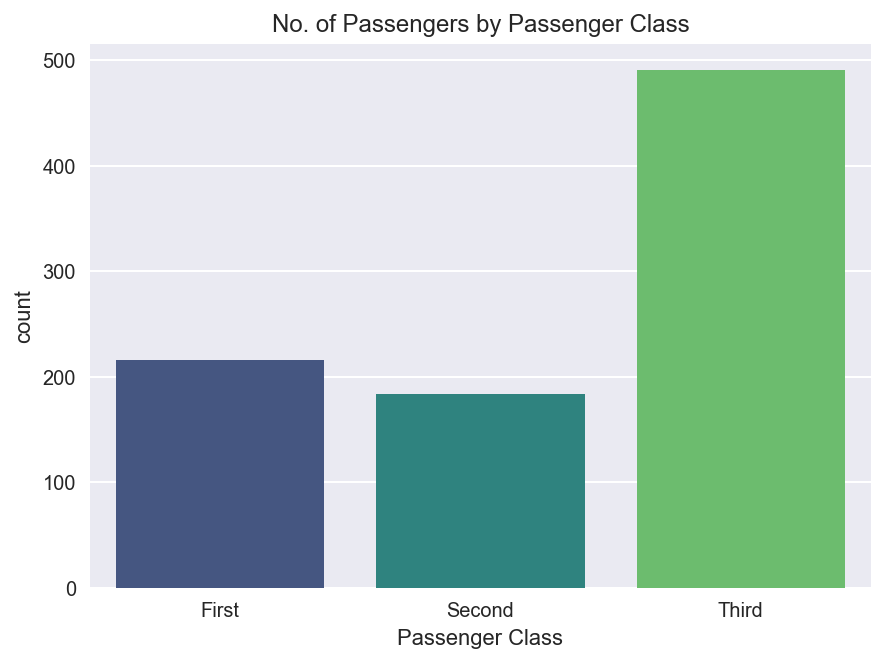

In [97]:
plt.figure(figsize=(7, 5))
sns.countplot('Passenger Class', data=titanic_df, order=sorted_classes, 
              palette='viridis');
plt.title('No. of Passengers by Passenger Class');

#### What Was Their Placement Inside the Ship?
As mentioned in a previous section (see _Survived/Multi-Variable Relationships: Passenger Class, Age, and Deck Placement_) first class passengers occupied cabins on decks A-E, while second and third class passengers cabins on, respectively, decks D-F and E-G.

In particular, decks A-C were first class exclusives (with B including millionaires' suites), D was shared between first and second class passengers, E had rooms for all three classes (but was mostly for first and second class members), F had both second and third class cabins, a G only third class ones. In addition, the Boat deck had only one room, T, occupied by Mr Stephen Blackwell.

In [98]:
pd.crosstab(titanic_df['Passenger Class'], titanic_df['Deck'], margins=True)\
.reindex(columns=sorted_decks)

Deck,Boat,A,B,C,D,E,F,G,Unknown
Passenger Class,,,,,,,,,
First,1,15,47,59,29,25,0,0,40
Second,0,0,0,0,4,4,8,0,168
Third,0,0,0,0,0,3,5,4,479
All,1,15,47,59,33,32,13,4,687


#### Where Were the Most Expensive Cabins Located? Where the Cheapest Ones?

__Most Expensive.__ The most expensive cabins were on decks B (which included millionaires' suites) and C. Not surprisingly, these decks were first class exclusives. The topmost data point with deck unknown also belongs to deck B (see below).

__Cheapest.__ The least expensive cabins were on deck G. As expected, this deck was third class exclusive. Note that the lowest data points on decks A and B, corresponding to passengers who travelled with complimentary tickets and to Mr Frans Olof Carlsson (see above, _Surprising Data Points_) have been ignored.

The `jitter` argument in the Seaborn's factorplot spreads the data points so that multiple points with the same coordinate pairs do not overlap (although not as much as in a swarmplot).

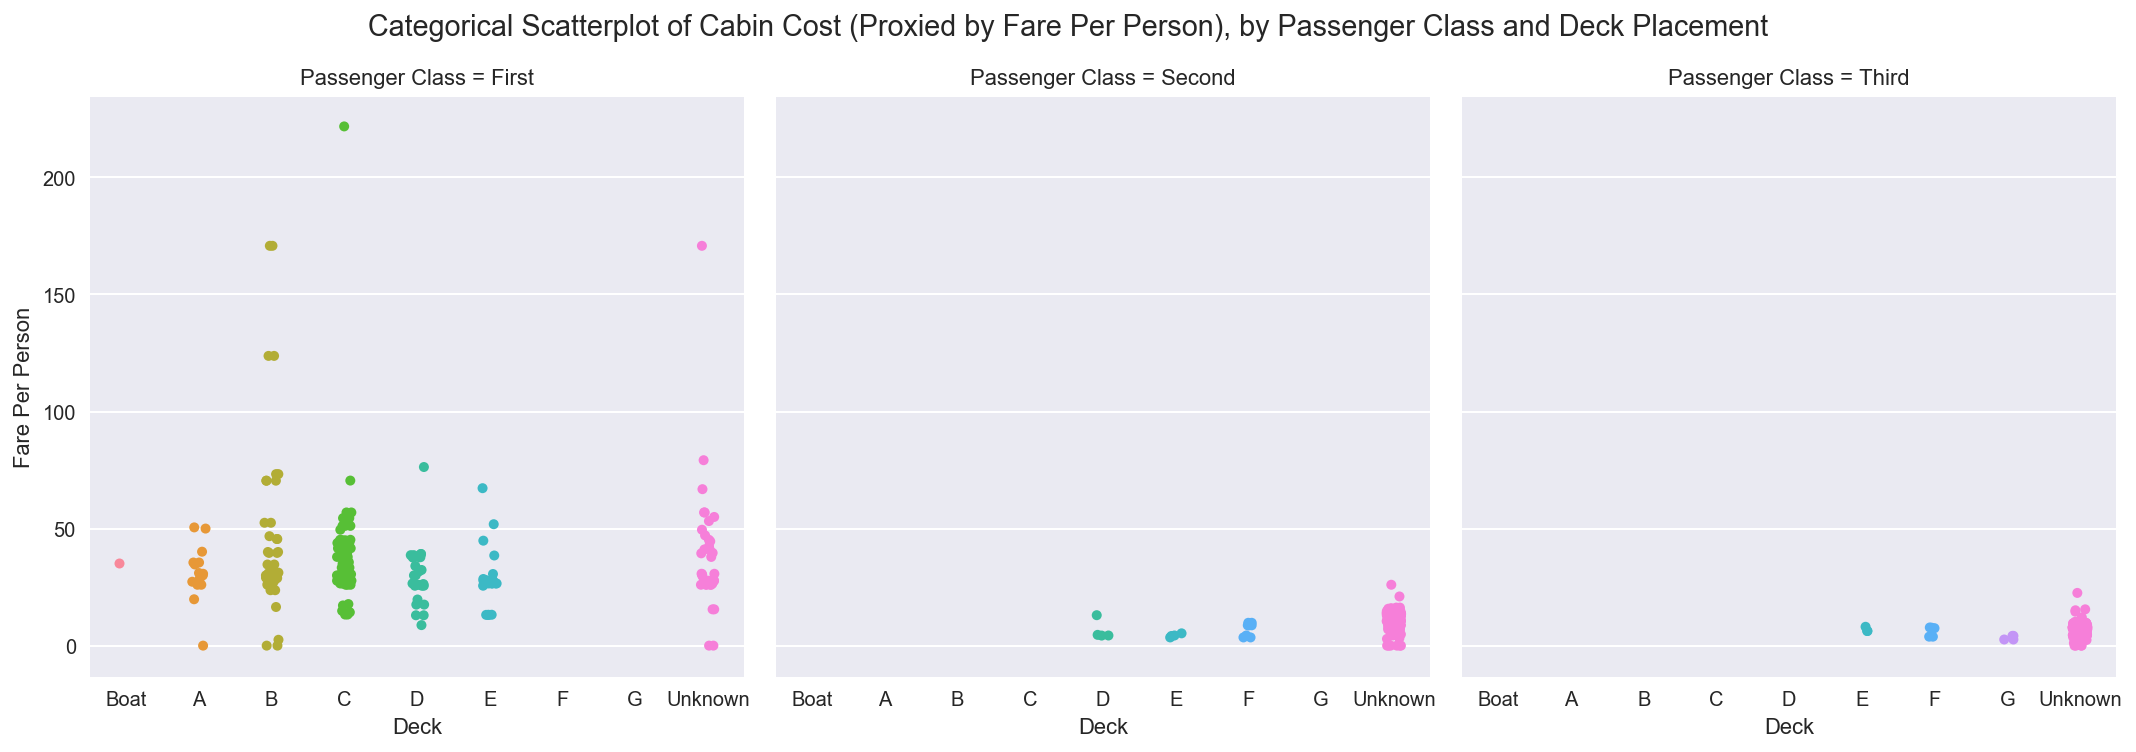

In [99]:
sns.factorplot(x='Deck', y='Fare Per Person', col='Passenger Class', 
               data=titanic_df, kind='strip', order=sorted_decks, 
               col_order=sorted_classes, size=5, jitter=True).fig.suptitle(\
'Categorical Scatterplot of Cabin Cost (Proxied by Fare Per Person), by \
Passenger Class and Deck Placement', y=1.04);

#### Who Were the Biggest Spenders?

The biggest spenders in the dataset—the topmost points in the left plot—paid as much as £512.33 to board the Titanic. Today, this sum would be equivalent to [no less than £55,000 pounds](http://inflation.stephenmorley.org). Encyclopedia Titanica refers that these passengers were [Mrs Charlotte Cardeza](https://www.encyclopedia-titanica.org/titanic-survivor/charlotte-cardeza.html) (not in the dataset), her 36-year-old son Thomas, her maid Miss Anna Ward, and his valet Mr Gustave Lesueur. They "_brought with them fourteen trunks, four suitcases and three crates of baggage_", and would later "_file a detailed claim to the value of £36,567 2s (~£3,000,000) for their loss_".

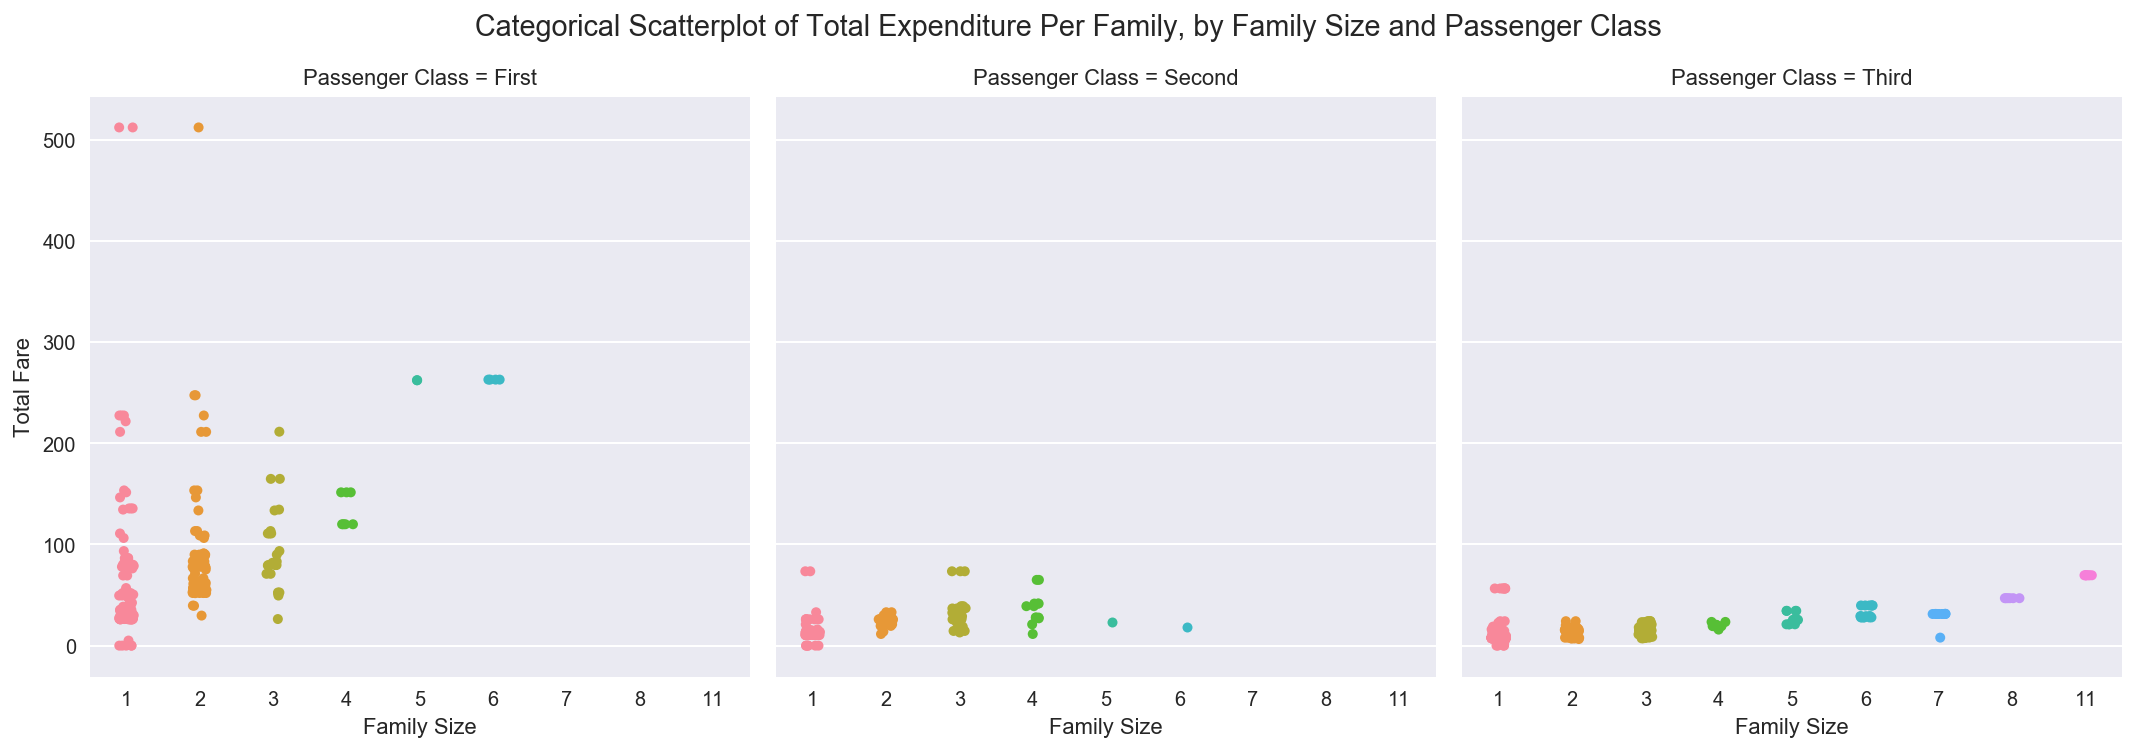

In [100]:
sns.factorplot(x='Family Size', y='Total Fare', col='Passenger Class', 
               data=titanic_df, kind='strip', size=5, col_order=sorted_classes, 
               jitter=True).fig.suptitle('Categorical Scatterplot of Total \
Expenditure Per Family, by Family Size and Passenger Class', y=1.04);

In [101]:
titanic_df.loc[titanic_df['Total Fare'] == titanic_df['Total Fare'].max()]

,Last Name,Title,First/Married Name,Maiden Name,Survived,Sex,Age,Imputed Age,Minor/Adult,Passenger Class,Higher Education,Religious Title,Siblings/Spouse Aboard,Parents/Children Aboard,Spouse Aboard,Family Size,Cabin,Deck,Port of Embarkation,Ticket No.,Total Fare,Fare Per Person
258,Ward,Miss,Anna,None,True,Female,35.0,35.0,Adult,First,False,False,0,0,False,1,NaN,Unknown,Cherbourg,PC 17755,512.33,170.78
679,Cardeza,Mr,Thomas Drake Martinez,None,True,Male,36.0,36.0,Adult,First,False,False,0,1,False,2,B51 B53 B55,B,Cherbourg,PC 17755,512.33,170.78
737,Lesurer,Mr,Gustave J,None,True,Male,35.0,35.0,Adult,First,False,False,0,0,False,1,B101,B,Cherbourg,PC 17755,512.33,170.78


#### Who Spent the Most for a Single Room?
According to the analysis, the passenger who spent the most for a single room was [Mr John Farthing](https://www.encyclopedia-titanica.org/titanic-victim/john-farthing.html), who paid £221.78, or ~£17,500 in today's money. However, Encyclopedia Titanica refers that this passenger was an employee of [Mr Isidor Straus](https://www.encyclopedia-titanica.org/titanic-victim/isidor-straus.html) and [Mrs Ida Straus](https://www.encyclopedia-titanica.org/titanic-victim/ida-straus.html), both also on the Titanic. Mr Farthing might have either paid the entire amount of his own pockets or travelled on his employers' ticket—it is hard to know without additional information.

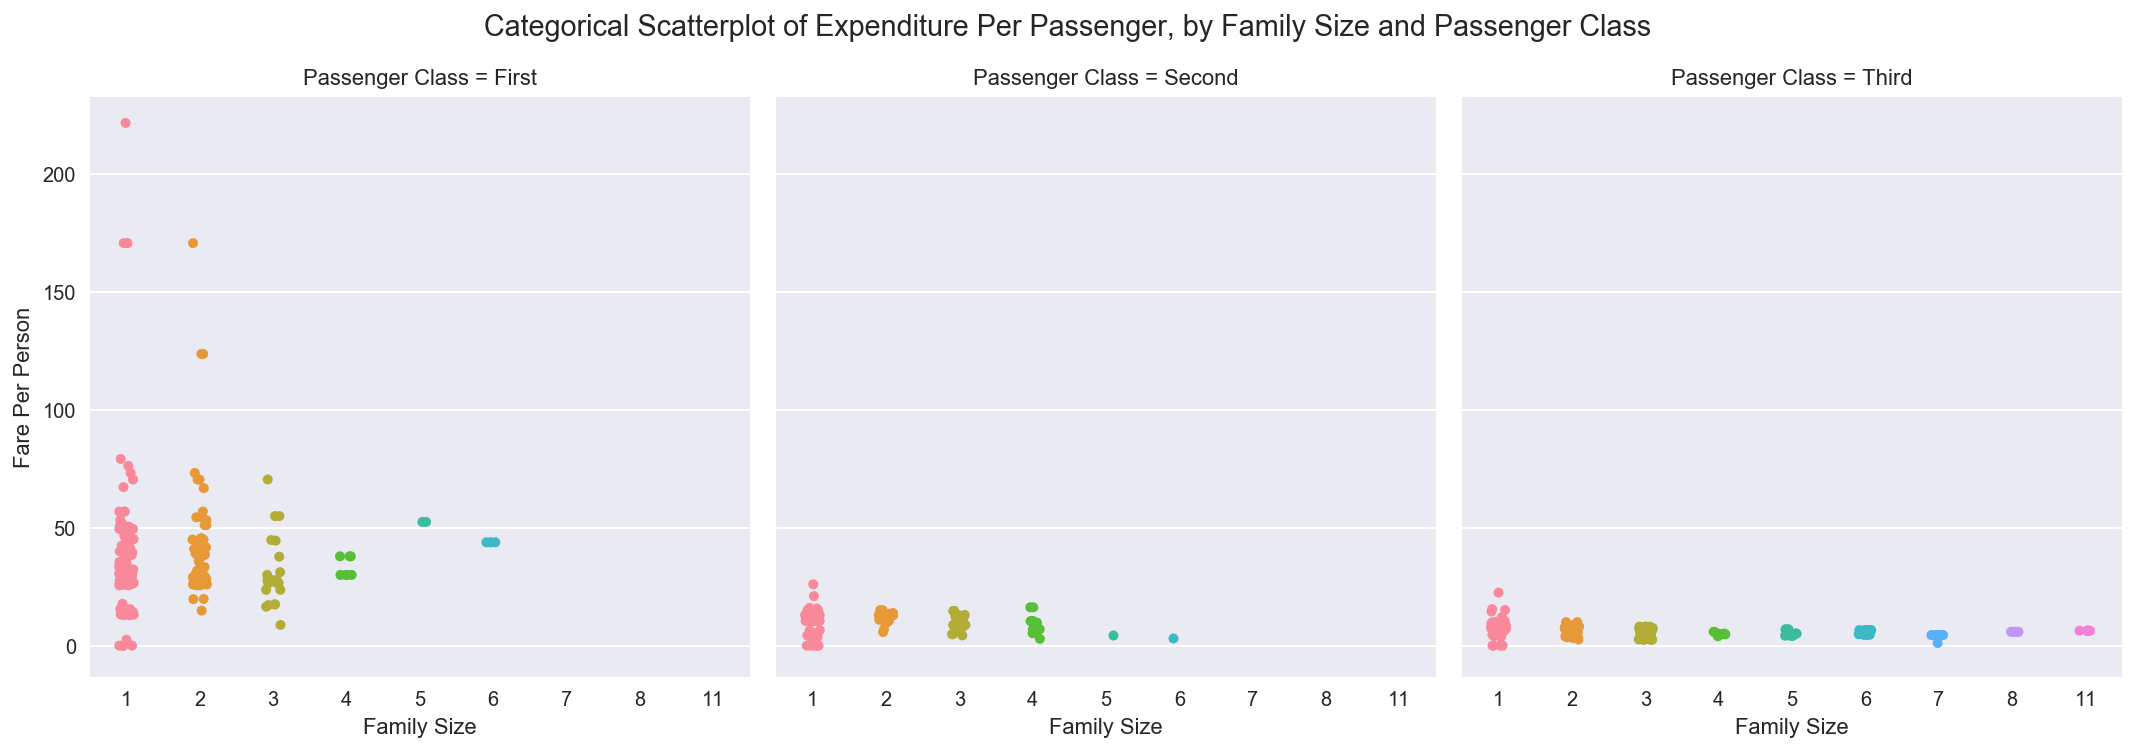

In [102]:
sns.factorplot(x='Family Size', y='Fare Per Person', col='Passenger Class',
               data=titanic_df, kind='strip', size=5, col_order=sorted_classes, 
               jitter = True).fig.suptitle('Categorical Scatterplot of \
Expenditure Per Passenger, by Family Size and Passenger Class', y=1.04);

In [103]:
titanic_df.loc[titanic_df['Fare Per Person'] == titanic_df['Fare Per Person']\
               .max()]

,Last Name,Title,First/Married Name,Maiden Name,Survived,Sex,Age,Imputed Age,Minor/Adult,Passenger Class,Higher Education,Religious Title,Siblings/Spouse Aboard,Parents/Children Aboard,Spouse Aboard,Family Size,Cabin,Deck,Port of Embarkation,Ticket No.,Total Fare,Fare Per Person
527,Farthing,Mr,John,None,False,Male,NaN,29.6991,NaN,First,False,False,0,0,False,1,C95,C,Southampton,PC 17483,221.78,221.78


### Family Composition

#### How Many Passengers Travelled With Their Family? How Many With Their Spouse?
Of the 891 passengers in the dataset, 354 (approximately 40%) travelled with their family. Of these, 79 (~9% of the total) travelled with their spouse.

In [104]:
with_family = titanic_df.loc[titanic_df['Family Size'] > 1, 'Family Size']\
.count()
with_spouse = titanic_df.loc[titanic_df['Spouse Aboard'], 'Spouse Aboard']\
.count()

In [105]:
print('Travelling with family: {} ({:.2f}%)'.format(with_family, with_family / \
                                                    len(titanic_df) * 100))
print('Travelling with spouse: {} ({:.2f}%)'.format(with_spouse, with_spouse / \
                                                    len(titanic_df) * 100))

Travelling with family: 354 (39.73%)
Travelling with spouse: 79 (8.87%)


#### Which Class Had the Most Numerous Families Onboard, On Average?
The most numerous families onboard—those with at least five members—were generally third class. This class had the largest number of households with five and six people, and the only one to have households with seven or more (one family had eleven). These families probably tried to pool their money to make the trip to New York City more affordable.

By contrast, most first class families on the Titanic were composed of two people, although this figure does not consider the size of their entourage. For instance, the previously mentioned Cardeza family travelled with a maid and a valet.

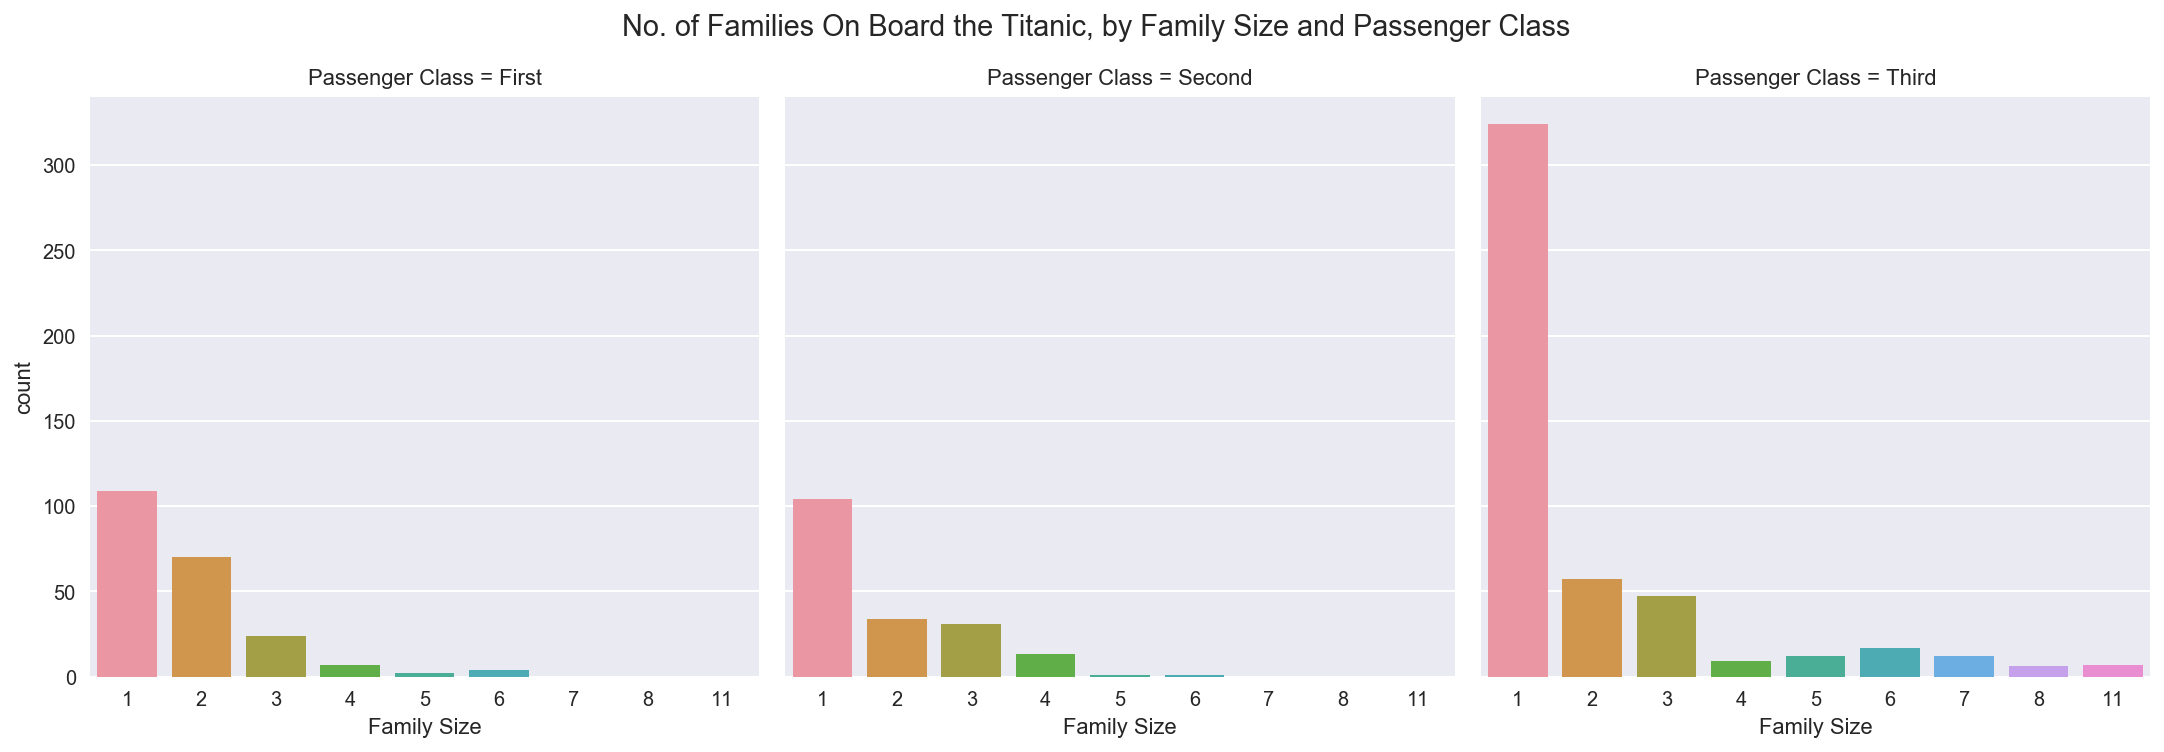

In [106]:
sns.factorplot(x='Family Size', col='Passenger Class', data=titanic_df, 
               col_order=sorted_classes, kind='count', size=5)\
.fig.suptitle('No. of Families On Board the Titanic, by Family Size and \
Passenger Class', y=1.04);

One first class household in the data sample also had six members: this was the Fortune family, consisting of [Mr Mark Fortune](https://www.encyclopedia-titanica.org/titanic-victim/mark-fortune.html), who Encyclopedia Titanica interestingly describes as "_a self made man with a bank account that matched the family name_", his wife, and their children. They occupied the three-room suite C23-25-27.

Several second class families were four-people: probably couples travelling with their children and/or with siblings.

In [107]:
titanic_df.loc[(titanic_df['Passenger Class'] == 'First') 
             & (titanic_df['Family Size'] == 6)]

,Last Name,Title,First/Married Name,Maiden Name,Survived,Sex,Age,Imputed Age,Minor/Adult,Passenger Class,Higher Education,Religious Title,Siblings/Spouse Aboard,Parents/Children Aboard,Spouse Aboard,Family Size,Cabin,Deck,Port of Embarkation,Ticket No.,Total Fare,Fare Per Person
27,Fortune,Mr,Charles Alexander,None,False,Male,19.0,19.0,Adult,First,False,False,3,2,True,6,C23 C25 C27,C,Southampton,19950,263.0,43.83
88,Fortune,Miss,Mabel Helen,None,True,Female,23.0,23.0,Adult,First,False,False,3,2,False,6,C23 C25 C27,C,Southampton,19950,263.0,43.83
341,Fortune,Miss,Alice Elizabeth,None,True,Female,24.0,24.0,Adult,First,False,False,3,2,False,6,C23 C25 C27,C,Southampton,19950,263.0,43.83
438,Fortune,Mr,Mark,None,False,Male,64.0,64.0,Adult,First,False,False,1,4,False,6,C23 C25 C27,C,Southampton,19950,263.0,43.83


#### How Is Family Size Related To Cabin Choice?
First class passengers travelling with small families (1-3 people) had rooms in each one of decks A-E, the placement probably related to money spent and time of booking. Larger families and their entourage, instead, had cabins on decks B-C.

Second class passengers stayed on decks D-F, but due to the large number of unknown data points it is impossible to say where small and large families were accomodated. Third class families stayed on decks E-G, although also for them no more can be said.

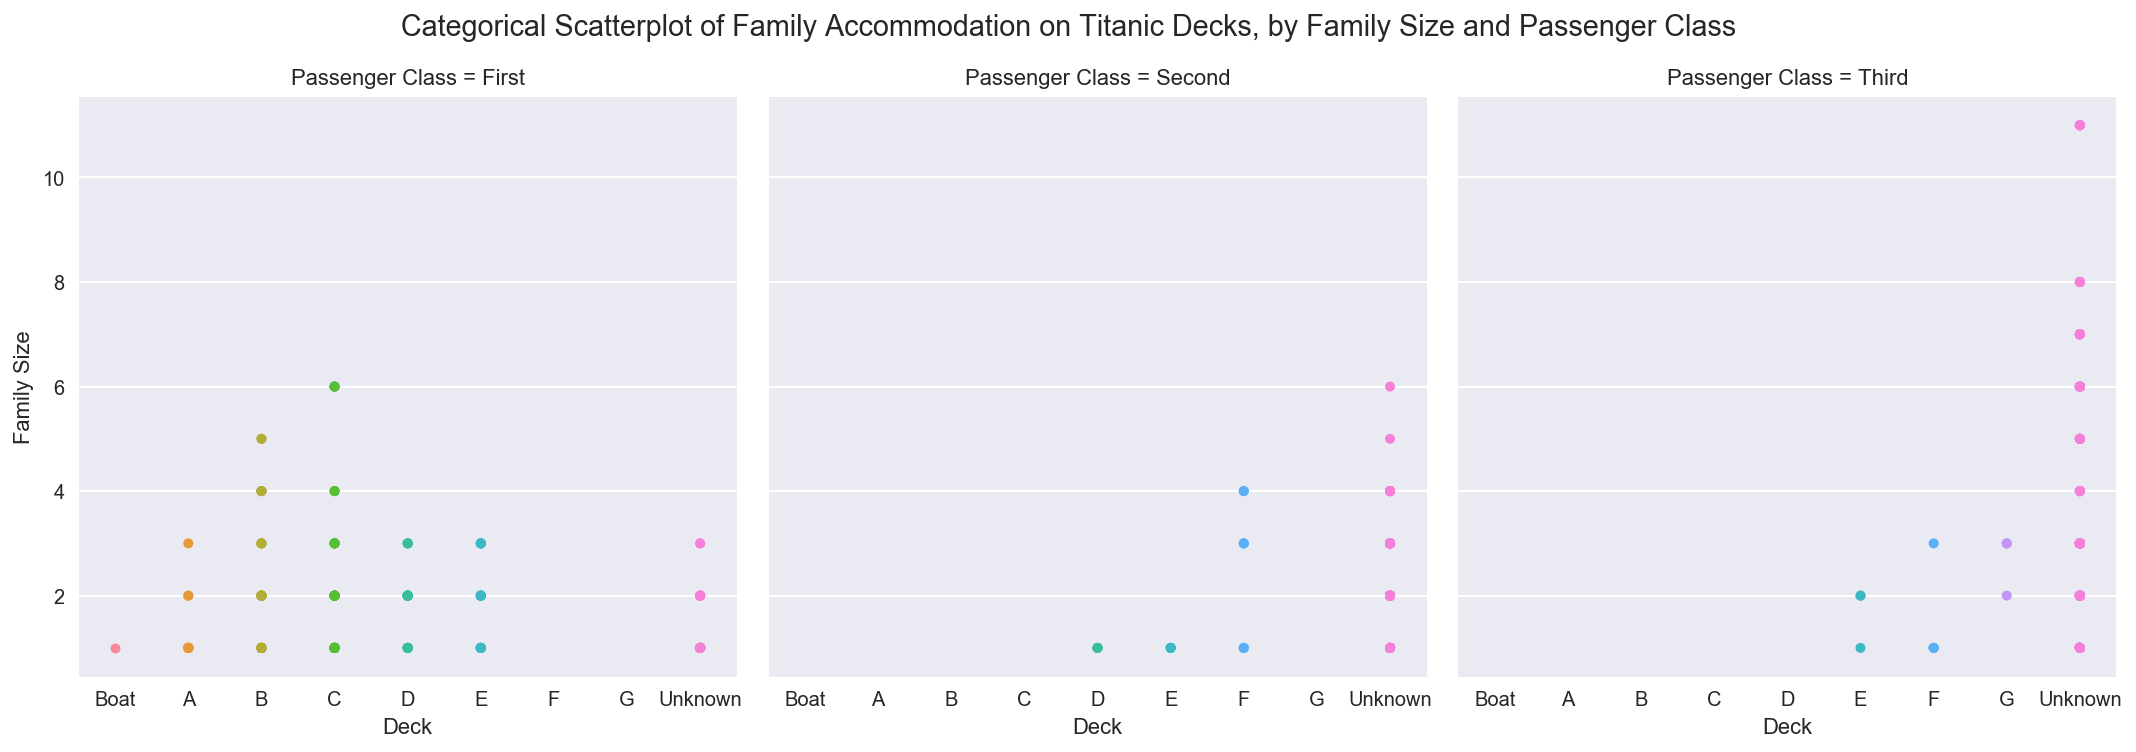

In [108]:
sns.factorplot(x='Deck', y='Family Size', col='Passenger Class', 
               data=titanic_df, kind='strip', size=5, order=sorted_decks, 
               col_order=sorted_classes).fig.suptitle('Categorical Scatterplot \
of Family Accommodation on Titanic Decks, by Family Size and Passenger Class', 
                                                      y=1.04);

## 4. Conclusions Phase
The project investigated Kaggle's _Titanic dataset_ using Python's data science libraries and according to the typical steps in data analysis: asking questions, acquiring and cleaning the data, exploring them, and finally drawing and communicating conclusions.

In the _Questions Phase_, three sets of questions were asked.

- The first set explored the _survival_ dimension: what was the overall survival rate? which characteristics of the passengers made survival more likely?


- The second one looked at the _socio-economic status_ of the people onboard: in which proportion did first, second, and third passengers embark the Titanic? which was their placement inside the ship? where were the most expensive cabins located, and where the cheapest ones? who were the biggest spenders and who spent the most for a single room?


- The last one focused on _family composition_: how many passengers travelled with their family and how many with their spouse? which class had the most numerous families onboard, on average? how was family size related to cabin choice?

In the _Data Wrangling Phase_, the dataset was imported (_data acquisition_) and cleaned (_data cleaning_). Starting from the raw data file, some modifications were made, including:

- adding columns Deck, Family Size, Minor/Adult, Spouse Aboard, Higher Education, Religious Title, and Fare Per Person;
- splitting passenger names to return last names, titles, first or married names, and maiden names, if any;
- aggregating titles (from sixteen honorifics to five);
- modifying variables Survived, Sex, Passenger Class, Port of Embarkation, and Fare Per Person.

_Surprising data points_ (wrong deck names, unknown ports of embarkation, free or too cheap fares), as well as _missing observations_, were also dealt with.

In the _Data Exploration Phase_, the questions posed in step one were carefully addressed. For the first set, related to _survival_:

- the overall, or unconditional, survival rate in the dataset was ~38%, slightly higher than the datum for the population (~32%);
- the survival rate seems to have been greatly conditioned by a strict application of the "women and children first" protocol which, apparently, favoured women, children, and upper class passengers.

Specifically, gender, age, and passenger class, among the others, were all found to be associated with survival. The association was measured by both the phi coefficients (for binary variables only) and Cramér's V, and its significance by Pearson's test of independence:

- for gender, the association with survival is quite strong—positive for females (~55%) and negative for men—as well as statistically significant (p-value ≈ 0); indeed, preference was given to ladies;


- for age, the association is present—positive for minors (~12%) and negative for adults—but not as intense as expected (p-value ~4%); in particular, most kids aged 0-6 were saved, but those aged 7-12 largely perished in the shipwreck; one reasonable explanation might be that kids up to six constantly stayed with their parents or nanny, while those between seven and twelve probably did not, and got lost during evacuation;


- for passenger class, association is again quite strong (Cramér's V: ~0.33) and statistically significant (p-value ≈ 0), with first class passengers seemingly having received a privileged treatment;

Other associations, such as with deck placement, title, family size, fare, and port of embarkation were also tested, although not all of them turned out to be significant. In any case, what is apparent is that the survival rate was influenced by a multitude of factors, as well as their combination, and no single variable alone can fully explain it (although the first three variables surveyed—gender, age, and passenger class—appear to be among the strongest predictors).

For the second set, related to the _socio-economic status_ of passengers:

- first and second class passengers boarded the Titanic in equal proportions (~20-25%), while third class members were about 55%;
- first class passengers occupied cabins on decks A-E, while second and third class passengers cabins on, respectively, decks D-F and E-G. Moreover, the Boat deck only had one room, T, occupied by Mr Stephen Blackwell;
- the most expensive cabins were on decks B (which included millionaires' suites) and C; not surprisingly, these decks were first class exclusives. The cheapest cabins were on deck G, a third-class exclusive;
- the biggest spenders in the dataset, Mrs Charlotte Cardeza and her entourage, spent £512.33, or about £55,000 in today's money, for the three-room millionaire suite B51-53-55. The person who spent the most for a single room was Mr John Farthing, who paid £221.78, or about ~£17,500.

For the third set, related to _family composition_:

- approximately 40% of the passengers in the dataset travelled with their family; of these, 22% (~9% of the total) travelled with their spouse;
- the most numerous families onboard—those with at least five members—were generally third class, and one of these even had eleven members. Most first class families had two members (although this datum does not consider their entourage), while second class families generally four, possibly couples travelling with children and/or siblings;
- first class passengers travelling with small families (1-3 people) had rooms in each one of decks A-E, the placement probably related to money spent and time of booking; larger families and their entourage, instead, had cabins on decks B-C. Second class and third class passengers stayed, respectively, on decks D-F and E-G, but due to the large number of unknown data points it is impossible to say where small and large families were accomodated.

## Bibliography

`[1]` _Python Data Science Handbook, Essential Tools for Working with Data_, Jake VanderPlas. Copyright 2016 O’Reilly Media, Inc., `978-1-491-91205-8`

`[2]` _Learning Python, 5th Edition_, Mark Lutz. Copyright 2013 O’Reilly Media, Inc., `978-1-449-35573-9`

Previous: [P1 Compute Statistics From Card Draws](../p1/dand-p1-compute-statistics-from-card-draws.ipynb) | [Table of Contents](https://github.com/federicomariamassari/udacity-dand/blob/master/README.md) | Next: [P3 Wrangle OpenStreetMap Data](https://github.com/federicomariamassari/udacity-dand/blob/master/projects/p3/dand-p3-wrangle-openstreetmap.md)